## The correlation between hospital beds and Covid-19 infected in US states

##### Here, I used datasets provided by institutes. The attributes are in README file.

### 1. EDA on Population (density) and Hospital beds

### Load Data and Aggregate

In [1]:
import numpy as np
import pandas as pd

**(1) Population & Density data**

In [2]:
# Population & Density
population=pd.read_csv("datasets/uspopulation.csv")
population.head()

State  TotalArea  LandArea  WaterArea   Density       Pop
0      Alaska     665384    570641      94743    1.2694    724357
1       Texas     268596    261232       7365  113.8081  29730311
2  California     163696    155779       7916  254.2929  39613493
3     Montana     147040    145546       1494    7.4547   1085004
4  New Mexico     121590    121298        292   17.3540   2105005

In [3]:
population["Pop"][0]/population["LandArea"][0]

1.2693742650808477

In [4]:
population["Pop"][0]/population["TotalArea"][0]

1.0886300241664963

In this data, the population density was calculated by dividing population by land area.

In [5]:
## Drop useless data
population.drop(['WaterArea','TotalArea'],axis=1,inplace=True)

In [6]:
population.head()

State  LandArea   Density       Pop
0      Alaska    570641    1.2694    724357
1       Texas    261232  113.8081  29730311
2  California    155779  254.2929  39613493
3     Montana    145546    7.4547   1085004
4  New Mexico    121298   17.3540   2105005

In [7]:
# Change the name of population column "Pop" into "Population"
population=population.rename(columns={"Pop":"Population"})

In [8]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State       50 non-null     object 
 1   LandArea    50 non-null     int64  
 2   Density     50 non-null     float64
 3   Population  50 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 1.7+ KB


In [9]:
print(population['State'].values)
print("\nThe number of state: ",len(population['State'].values))

['Alaska' 'Texas' 'California' 'Montana' 'New Mexico' 'Arizona' 'Nevada'
 'Colorado' 'Oregon' 'Wyoming' 'Michigan' 'Minnesota' 'Utah' 'Idaho'
 'Kansas' 'Nebraska' 'South Dakota' 'Washington' 'North Dakota' 'Oklahoma'
 'Missouri' 'Florida' 'Wisconsin' 'Georgia' 'Illinois' 'Iowa' 'New York'
 'North Carolina' 'Arkansas' 'Alabama' 'Louisiana' 'Mississippi'
 'Pennsylvania' 'Ohio' 'Virginia' 'Tennessee' 'Kentucky' 'Indiana' 'Maine'
 'South Carolina' 'West Virginia' 'Maryland' 'Hawaii' 'Massachusetts'
 'Vermont' 'New Hampshire' 'New Jersey' 'Connecticut' 'Delaware'
 'Rhode Island']

The number of state:  50


There are 50 states in this data.

**(2) Hospital beds data**

In [10]:
# Hospital beds
beds=pd.read_csv("datasets/ushospitalbeds.csv")
beds.head()

HRR  Total Hospital Beds  Total ICU Beds  \
0         Abilene, TX                980.0           127.0   
1           Akron, OH               1358.0           186.0   
2  Alameda County, CA               2695.0           293.0   
3          Albany, GA                704.0            60.0   
4          Albany, NY               4804.0           425.0   

   Available Hospital Beds  Potentially Available Hospital Beds*  \
0                    565.0                                 772.0   
1                    518.0                                 938.0   
2                    665.0                                1680.0   
3                    221.0                                 462.0   
4                   1579.0                                3191.0   

   Available ICU Beds  Potentially Available ICU Beds*  Adult Population  \
0                68.0                             98.0          226444.0   
1                94.0                            140.0          547990.0   
2               139.0                            216.0         1310189.0   
3                27.0                             43.0          157143.0   
4               193.0                            309.0         1477723.0   

   Population 65+  Projected Infected Individuals  ...  \
0         50412.0                         45289.0  ...   
1        111042.0                        109598.0  ...   
2        214991.0                        262038.0  ...   
3         30466.0                         31429.0  ...   
4        318695.0                        295545.0  ...   

   Percentage of Potentially Available ICU Beds Needed, Six Months  \
0                                               142%                 
1                                               236%                 
2                                               352%                 
3                                               219%                 
4                                               292%                 

   Percentage of Total ICU Beds Needed, Six Months  \
0                                             109%   
1                                             178%   
2                                             259%   
3                                             157%   
4                                             212%   

   ICU Beds Needed, Twelve Months  \
0                              70   
1                             165   
2                             380   
3                              47   
4                             452   

   Percentage of Available ICU Beds Needed, Twelve Months  \
0                                               103%        
1                                               176%        
2                                               273%        
3                                               174%        
4                                               234%        

  Percentage of Potentially Available ICU Beds Needed, Twelve Months  \
0                                                71%                   
1                                               118%                   
2                                               176%                   
3                                               109%                   
4                                               146%                   

  Percentage of Total ICU Beds Needed, Twelve Months  \
0                                                55%   
1                                                89%   
2                                               130%   
3                                                78%   
4                                               106%   

  ICU Beds Needed, Eighteen Months  \
0                               45   
1                              108   
2                              248   
3                               31   
4                              294   

  Percentage of Available ICU Beds Needed, Eighteen Months  \
0                                

EDA of all columns in this data will be processed in another notebook. Here, I will use total hospital and ICU beds.

In [11]:
# Pick useful data
beds=beds.loc[:,"HRR":"Total ICU Beds"]

In [12]:
beds.head()

HRR  Total Hospital Beds  Total ICU Beds
0         Abilene, TX                980.0           127.0
1           Akron, OH               1358.0           186.0
2  Alameda County, CA               2695.0           293.0
3          Albany, GA                704.0            60.0
4          Albany, NY               4804.0           425.0

In [13]:
beds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   HRR                  305 non-null    object 
 1   Total Hospital Beds  305 non-null    float64
 2   Total ICU Beds       305 non-null    float64
dtypes: float64(2), object(1)
memory usage: 23.5+ KB


In [14]:
# Drop missing data ; It's the only way to solve missing data because there's also no data in state and province.
beds.dropna(inplace=True)

In [15]:
values=beds['HRR'].str.split(",",n=1,expand=True)
beds['state']=values[1]
beds['city']=values[0]

In [16]:
beds=beds[['state','city','Total Hospital Beds','Total ICU Beds']]
beds.head()

state            city  Total Hospital Beds  Total ICU Beds
0    TX         Abilene                980.0           127.0
1    OH           Akron               1358.0           186.0
2    CA  Alameda County               2695.0           293.0
3    GA          Albany                704.0            60.0
4    NY          Albany               4804.0           425.0

In [17]:
# Add hospital beds by states to merge population data
beds_state=pd.DataFrame(beds.groupby('state')['Total Hospital Beds'].sum())
beds_state['Total ICU Beds']=beds.groupby('state')['Total ICU Beds'].sum()

In [18]:
beds_state.head()

Total Hospital Beds  Total ICU Beds
state                                     
 AK                 1583.0           130.0
 AL                14793.0          1903.0
 AR                 8560.0           908.0
 AZ                12590.0          1702.0
 CA                68074.0          8105.0

In [19]:
beds_state=beds_state.reset_index()

In [20]:
beds_state.head()

state  Total Hospital Beds  Total ICU Beds
0    AK               1583.0           130.0
1    AL              14793.0          1903.0
2    AR               8560.0           908.0
3    AZ              12590.0          1702.0
4    CA              68074.0          8105.0

In [21]:
print(beds_state['state'].values)
print("\nThe number of state: ", len(beds_state['state'].values))

[' AK' ' AL' ' AR' ' AZ' ' CA' ' CO' ' CT' ' DC' ' DE' ' FL' ' GA' ' HI'
 ' IA' ' ID' ' IL' ' IN' ' KS' ' KY' ' LA' ' MA' ' MD' ' ME' ' MI' ' MN'
 ' MO' ' MS' ' MT' ' NC' ' ND' ' NE' ' NH' ' NJ' ' NM' ' NV' ' NY' ' OH'
 ' OK' ' OR' ' PA' ' RI' ' SC' ' SD' ' TN' ' TX' ' UT' ' VA' ' VT' ' WA'
 ' WI' ' WV' ' WY']

The number of state:  51


In [22]:
# Confirm there's no missing data
beds_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                51 non-null     object 
 1   Total Hospital Beds  51 non-null     float64
 2   Total ICU Beds       51 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


#### (3) Merge data

In [23]:
## Merging population and hospital beds data
state_code=['AK','TX','CA','MT','NM','AZ','NV','CO','OR','WY','MI','MN','UT','ID','KS','NE','SD','WA','ND','OK','MO','FL','WI','GA','IL','IA','NY','NC','AR','AL','LA','MS','PA','OH','VA','TN','KY','IN','ME','SC','WV','MD','HI','MA','VT','NH','NJ','CT','DE','RI']
population['state_code']=state_code
population=population.sort_values(by=['state_code'])

In [24]:
population=population.reset_index()
population.drop(['index'],axis=1,inplace=True)
population.head()

State  LandArea   Density  Population state_code
0      Alaska    570641    1.2694      724357         AK
1     Alabama     50645   97.4271     4934193         AL
2    Arkansas     52035   58.3059     3033946         AR
3     Arizona    113594   66.2016     7520103         AZ
4  California    155779  254.2929    39613493         CA

In [25]:
# Remove "DC" data in beds_state because it's not in population data
beds_state.drop(beds_state.index[7],axis=0,inplace=True)
beds_state.reset_index(inplace=True,drop=True)

In [26]:
data=pd.merge(population,beds_state,left_index=True,right_index=True)

In [27]:
data.drop(['state_code','state'],inplace=True,axis=1)
data.head()

State  LandArea   Density  Population  Total Hospital Beds  \
0      Alaska    570641    1.2694      724357               1583.0   
1     Alabama     50645   97.4271     4934193              14793.0   
2    Arkansas     52035   58.3059     3033946               8560.0   
3     Arizona    113594   66.2016     7520103              12590.0   
4  California    155779  254.2929    39613493              68074.0   

   Total ICU Beds  
0           130.0  
1          1903.0  
2           908.0  
3          1702.0  
4          8105.0

In [28]:
data.sort_values(['State'],inplace=True)
data.reset_index(inplace=True,drop=True)
data.head()

State  LandArea   Density  Population  Total Hospital Beds  \
0     Alabama     50645   97.4271     4934193              14793.0   
1      Alaska    570641    1.2694      724357               1583.0   
2     Arizona    113594   66.2016     7520103              12590.0   
3    Arkansas     52035   58.3059     3033946               8560.0   
4  California    155779  254.2929    39613493              68074.0   

   Total ICU Beds  
0          1903.0  
1           130.0  
2          1702.0  
3           908.0  
4          8105.0

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State                50 non-null     object 
 1   LandArea             50 non-null     int64  
 2   Density              50 non-null     float64
 3   Population           50 non-null     int64  
 4   Total Hospital Beds  50 non-null     float64
 5   Total ICU Beds       50 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 2.5+ KB


In [ ]:
data.to_csv("")

### Plotting

**(1) Population**

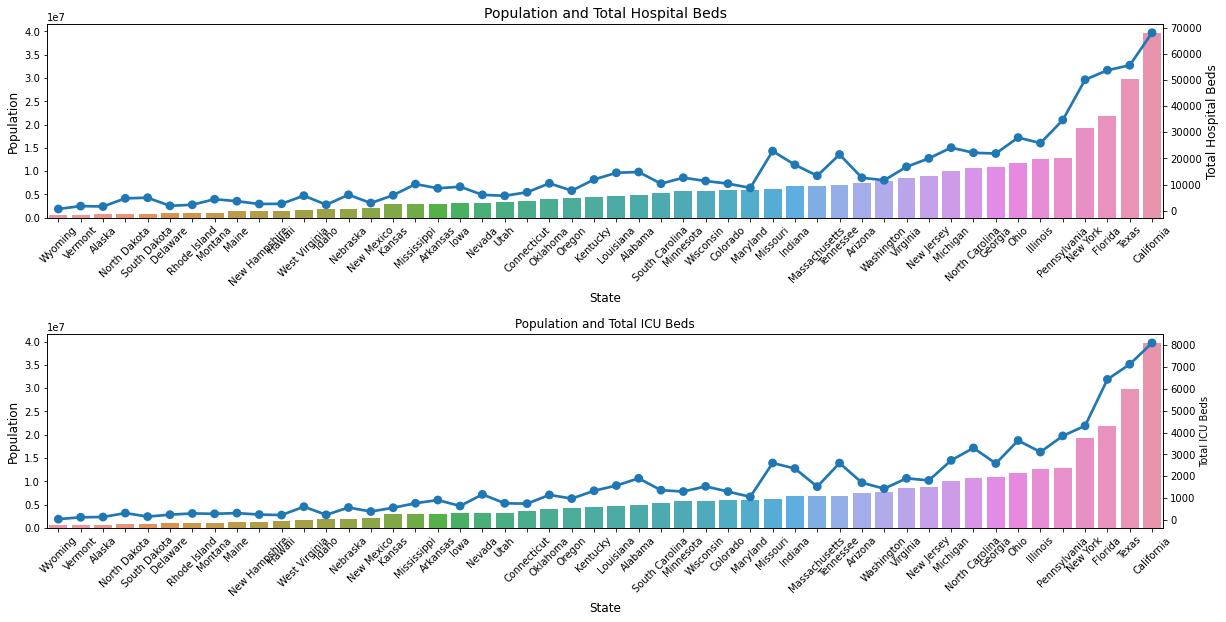

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

data_sortby_population=data.sort_values(['Population'],ascending=True)

plt.figure(figsize=(20,8))
plt.subplot(211)
g1=sns.barplot(x="State",y="Population",data=data_sortby_population)
g1.set_xlabel("State",fontsize=12)
g1.set_ylabel("Population",fontsize=12)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1t=g1.twinx()
g1t=sns.pointplot(x="State",y="Total Hospital Beds",data=data_sortby_population)
g1t.set_ylabel("Total Hospital Beds",fontsize=12)
g1.set_title("Population and Total Hospital Beds",fontsize=14)

plt.subplot(212)
g2=sns.barplot(x="State",y="Population",data=data_sortby_population)
g2.set_xlabel("State",fontsize=12)
g2.set_ylabel("Population",fontsize=12)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)
g2t=g2.twinx()
g2t=sns.pointplot(x="State",y="Total ICU Beds",data=data_sortby_population)
g2t.set_ylabel("Total ICU Beds")
g2.set_title("Population and Total ICU Beds")

plt.subplots_adjust(hspace=0.6,top=1.0)
plt.show()

We can find that the more population is, the more total hospital beds and ICU beds are provided in states.
* California have the most population, total hospital and ICU beds.
* Five states of the most total hospital beds : California, Texas, Florida, New York and Pensylvania
* Five states of the most total ICU beds : California, Texas, Florida, New York and Pensylvania

**(2) Total Hospital and ICU beds**

From the finding above, I became curious whether there are some patterns between total hospital beds and ICU beds.

In [31]:
import plotly.express as px

fig=px.treemap(data,path=['State'],values="Total Hospital Beds",color="Total ICU Beds",hover_data=['State']
               ,color_continuous_scale='dense',title='Total Hospital/ICU Beds in different states')
fig.show()

By this, we can find that the more total hospital beds are, the more total ICU beds are provided in states.

<< Ranking >>
* California
* Texas
* Florida
* New York
* Pensylvania
* Ohio

Some exceptions exist, but we will look at this correlation after plotting all of feaures.

**(3) Population density**

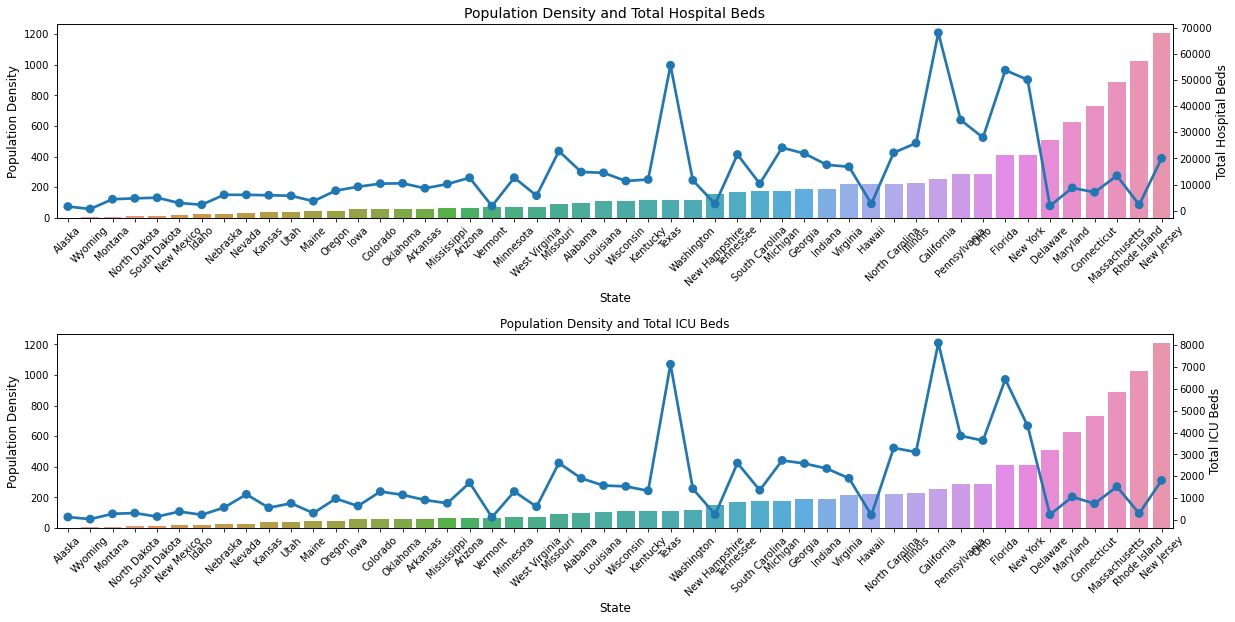

In [32]:
data_sortby_density=data.sort_values(['Density'],ascending=True)

plt.figure(figsize=(20,8))
plt.subplot(211)
g1=sns.barplot(x="State",y="Density",data=data_sortby_density)
g1.set_xlabel("State",fontsize=12)
g1.set_ylabel("Population Density",fontsize=12)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1t=g1.twinx()
g1t=sns.pointplot(x="State",y="Total Hospital Beds",data=data_sortby_density)
g1t.set_ylabel("Total Hospital Beds",fontsize=12)
g1.set_title("Population Density and Total Hospital Beds",fontsize=14)

plt.subplot(212)
g2=sns.barplot(x="State",y="Density",data=data_sortby_density)
g2.set_xlabel("State",fontsize=12)
g2.set_ylabel("Population Density",fontsize=12)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)
g2t=g2.twinx()
g2t=sns.pointplot(x="State",y="Total ICU Beds",data=data_sortby_density)
g2t.set_ylabel("Total ICU Beds",fontsize=12)
g2.set_title("Population Density and Total ICU Beds")

plt.subplots_adjust(hspace=0.6,top=1.0)
plt.show()

Population density, total hospital and ICU beds don't seem to have any patterns. I think this is because of area variable.

**(4) Land Area**

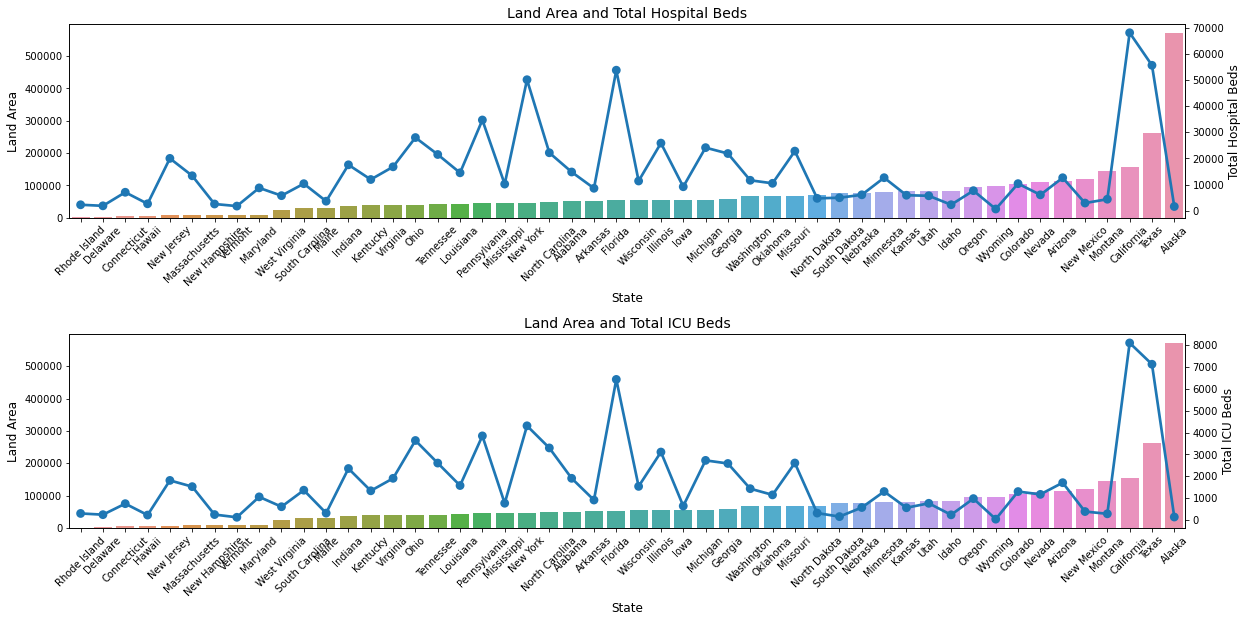

In [33]:
data_sortby_area=data.sort_values(['LandArea'],ascending=True)

plt.figure(figsize=(20,8))
plt.subplot(211)
g1=sns.barplot(x="State",y="LandArea",data=data_sortby_area)
g1.set_xlabel("State",fontsize=12)
g1.set_ylabel("Land Area",fontsize=12)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1t=g1.twinx()
g1t=sns.pointplot(x="State",y="Total Hospital Beds",data=data_sortby_area)
g1t.set_ylabel("Total Hospital Beds",fontsize=12)
g1.set_title("Land Area and Total Hospital Beds",fontsize=14)

plt.subplot(212)
g2=sns.barplot(x="State",y="LandArea",data=data_sortby_area)
g2.set_xlabel("State",fontsize=12)
g2.set_ylabel("Land Area",fontsize=12)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)
g2t=g2.twinx()
g2t=sns.pointplot(x="State",y="Total ICU Beds",data=data_sortby_area)
g2t.set_ylabel("Total ICU Beds",fontsize=12)
g2.set_title("Land Area and Total ICU Beds",fontsize=14)

plt.subplots_adjust(hspace=0.6,top=1.0)
plt.show()

There might be no patterns between land area, total hospital and ICU beds.

**(5) Land Area and Population**

I wanted to find whether there are any correlation between land area and population though there's typical examples like Alaska.

In [34]:
import plotly.express as px

fig=px.treemap(data,path=["State"],values="LandArea",color="Population",color_continuous_scale="dense",hover_data=["State"],
              title="LandArea/Population in different states")
fig.show()

There's no relationship between land area and population.

> In plotting section, we found that there are some relationships between population, total hospital and ICU beds.

### New Features & Plotting

**(1) Per Population**

In [35]:
data['Beds_perPop(%)']=np.round(data['Total Hospital Beds']/data['Population'],4)*100
data['ICU_perPop(%)']=np.round(data['Total ICU Beds']/data['Population'],4)*100
data.head()

State  LandArea   Density  Population  Total Hospital Beds  \
0     Alabama     50645   97.4271     4934193              14793.0   
1      Alaska    570641    1.2694      724357               1583.0   
2     Arizona    113594   66.2016     7520103              12590.0   
3    Arkansas     52035   58.3059     3033946               8560.0   
4  California    155779  254.2929    39613493              68074.0   

   Total ICU Beds  Beds_perPop(%)  ICU_perPop(%)  
0          1903.0            0.30           0.04  
1           130.0            0.22           0.02  
2          1702.0            0.17           0.02  
3           908.0            0.28           0.03  
4          8105.0            0.17           0.02

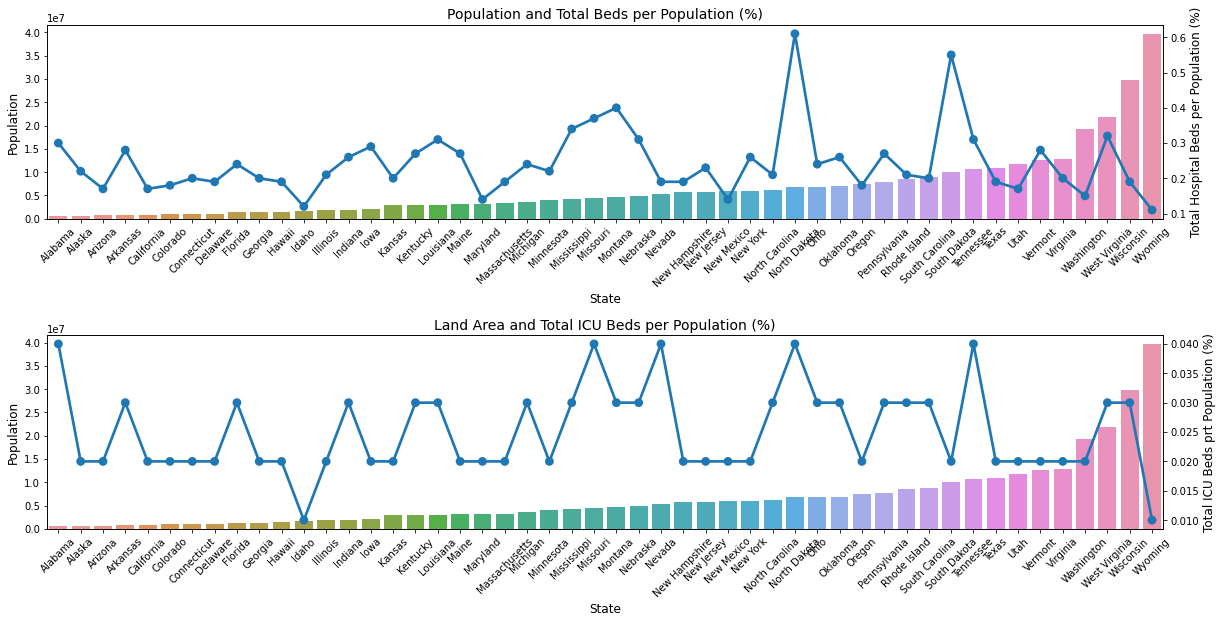

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Population and Beds_perPop
plt.figure(figsize=(20,8))
plt.subplot(211)
g1=sns.barplot(x="State",y="Population",data=data_sortby_population)
g1.set_xlabel("State",fontsize=12)
g1.set_ylabel("Population",fontsize=12)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1t=g1.twinx()
g1t=sns.pointplot(x="State",y="Beds_perPop(%)",data=data)
g1t.set_ylabel("Total Hospital Beds per Population (%)",fontsize=12)
g1.set_title("Population and Total Beds per Population (%)",fontsize=14)

# Population and ICU_perPop
plt.subplot(212)
g2=sns.barplot(x="State",y="Population",data=data_sortby_population)
g2.set_xlabel("State",fontsize=12)
g2.set_ylabel("Population",fontsize=12)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)
g2t=g2.twinx()
g2t=sns.pointplot(x="State",y="ICU_perPop(%)",data=data)
g2t.set_ylabel("Total ICU Beds prt Population (%)",fontsize=12)
g2.set_title("Land Area and Total ICU Beds per Population (%)",fontsize=14)

plt.subplots_adjust(hspace=0.6,top=1.0)
plt.show()

We can't find any patterns between them.

**(2) Per Land Area**

In [37]:
data['Beds_perArea(%)']=np.round(data['Total Hospital Beds']/data['LandArea'],4)*100
data['ICU_perArea(%)']=np.round(data['Total ICU Beds']/data['LandArea'],4)*100
data.head()

State  LandArea   Density  Population  Total Hospital Beds  \
0     Alabama     50645   97.4271     4934193              14793.0   
1      Alaska    570641    1.2694      724357               1583.0   
2     Arizona    113594   66.2016     7520103              12590.0   
3    Arkansas     52035   58.3059     3033946               8560.0   
4  California    155779  254.2929    39613493              68074.0   

   Total ICU Beds  Beds_perPop(%)  ICU_perPop(%)  Beds_perArea(%)  \
0          1903.0            0.30           0.04            29.21   
1           130.0            0.22           0.02             0.28   
2          1702.0            0.17           0.02            11.08   
3           908.0            0.28           0.03            16.45   
4          8105.0            0.17           0.02            43.70   

   ICU_perArea(%)  
0            3.76  
1            0.02  
2            1.50  
3            1.74  
4            5.20

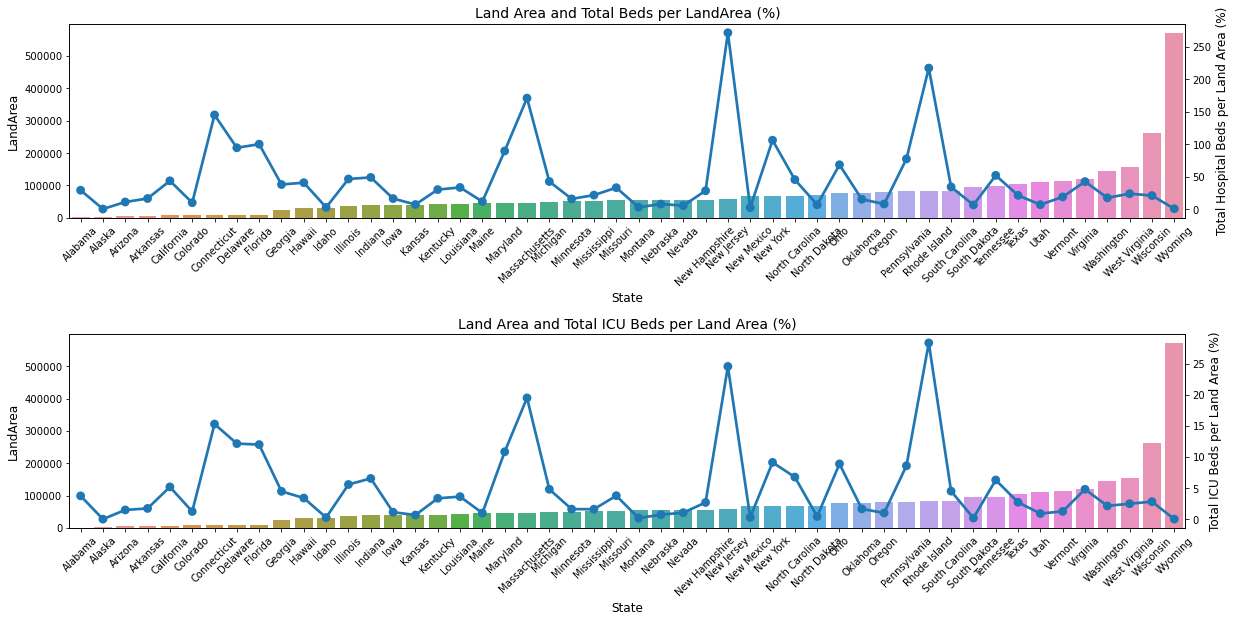

In [38]:
# LandArea and Beds_perArea
plt.figure(figsize=(20,8))
plt.subplot(211)
g1=sns.barplot(x="State",y="LandArea",data=data_sortby_area)
g1.set_xlabel("State",fontsize=12)
g1.set_ylabel("LandArea",fontsize=12)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1t=g1.twinx()
g1t=sns.pointplot(x="State",y="Beds_perArea(%)",data=data)
g1t.set_ylabel("Total Hospital Beds per Land Area (%)",fontsize=12)
g1.set_title("Land Area and Total Beds per LandArea (%)",fontsize=14)

# LandArea and ICU_perPop
plt.subplot(212)
g2=sns.barplot(x="State",y="LandArea",data=data_sortby_area)
g2.set_xlabel("State",fontsize=12)
g2.set_ylabel("LandArea",fontsize=12)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)
g2t=g2.twinx()
g2t=sns.pointplot(x="State",y="ICU_perArea(%)",data=data)
g2t.set_ylabel("Total ICU Beds per Land Area (%)",fontsize=12)
g2.set_title("Land Area and Total ICU Beds per Land Area (%)",fontsize=14)

plt.subplots_adjust(hspace=0.6,top=1.0)
plt.show()

We can't find any patterns bewteen them either.

In [39]:
# Drop useless new features
data.drop(['ICU_perPop(%)',"Beds_perPop(%)","Beds_perArea(%)",'ICU_perArea(%)'],axis=1,inplace=True)

### Clustering

In [52]:
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans=KMeans()
visualizer=KElbowVisualizer(kmeans,k=(2,5))

In [35]:
## clustering
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.cluster import KMeans

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math

def visualize_silhouette(cluster_lists,X_features):
    n_cols=len(cluster_lists)
    fig,axs=plt.subplots(figsize=(4*n_cols,4),nrows=1,ncols=n_cols)
    
    for ind,n_cluster in enumerate(cluster_lists):
        clusterer=KMeans(n_clusters=n_cluster,max_iter=500,random_state=144)
        cluster_labels=clusterer.fit_predict(X_features)
        sil_avg=silhouette_score(X_features,cluster_labels)
        sil_values=silhouette_samples(X_features,cluster_labels)
        y_lower=10
        axs[ind].set_title("Number of Cluster: "+str(n_cluster)+"\nSilhouette Score: "+str(np.round(sil_avg,3)))
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1,1])
        axs[ind].set_ylim([0,len(X_features)+(n_cluster+1)*10])
        axs[ind].set_yticks([])
        axs[ind].set_xticks([0,0.2,0.4,0.6,0.8,1])
        
        for i in range(n_cluster):
            ith_cluster_sil_values=sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            size_cluster_i=ith_cluster_sil_values.shape[0]
            y_upper=y_lower+size_cluster_i
            color=cm.nipy_spectral(float(i)/n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_sil_values,facecolor=color,edgecolor=color,alpha=0.7)
            axs[ind].text(-0.05,y_lower+0.5*size_cluster_i,str(i))
            y_lower=y_upper+10
        axs[ind].axvline(x=sil_avg,color="red",linestyle="--")

**(1) Cluster by population**

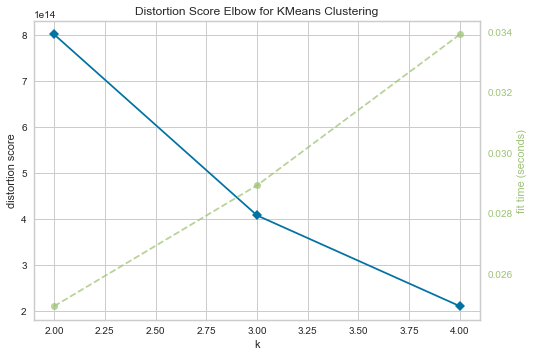

In [53]:
visualizer.fit(data[['Population']])
visualizer.poof();

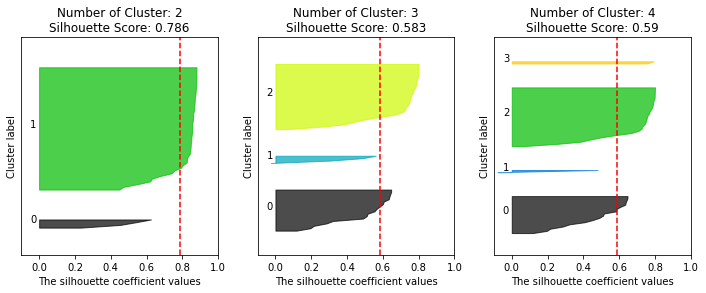

In [41]:
X=data[['Population']]
visualize_silhouette([2,3,4],X)

It's better not to use this clustering.

**(2) Cluster by population density**

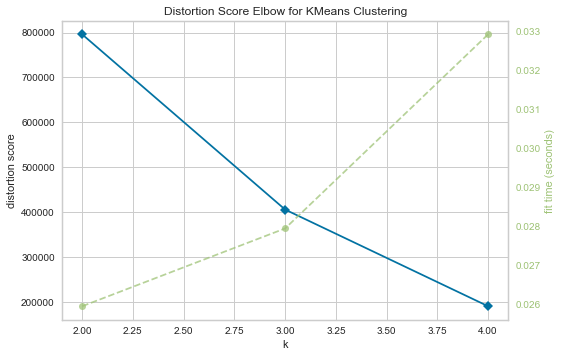

In [51]:
visualizer=KElbowVisualizer(kmeans,k=(2,5))
visualizer.fit(data[['Density']])
visualizer.poof();

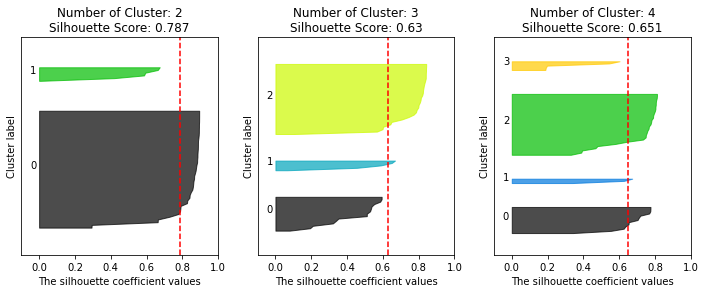

In [42]:
X=data[['Density']]
visualize_silhouette([2,3,4],X)

It's also better not to use this clustering.

**(3) Cluster by Total Hospital Beds**

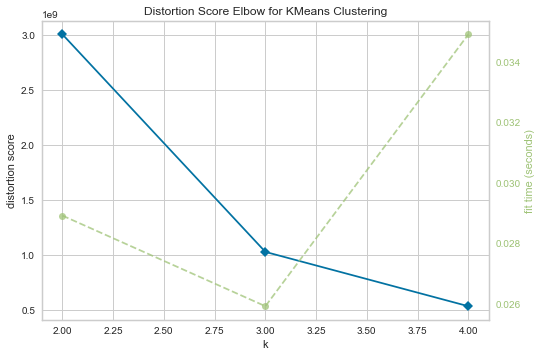

In [50]:
visualizer=KElbowVisualizer(kmeans,k=(2,5))
visualizer.fit(data[['Total Hospital Beds']])
visualizer.poof();

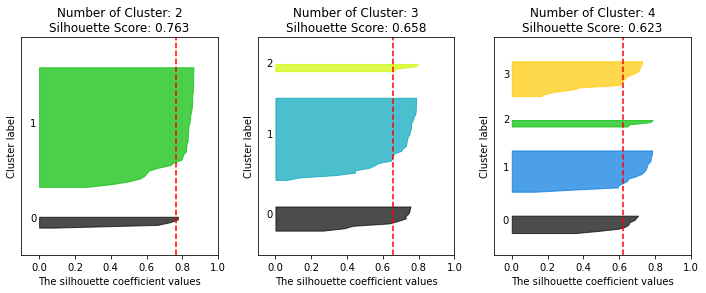

In [43]:
X=data[['Total Hospital Beds']]
visualize_silhouette([2,3,4],X)

**(4) Cluster by Total ICU Beds**

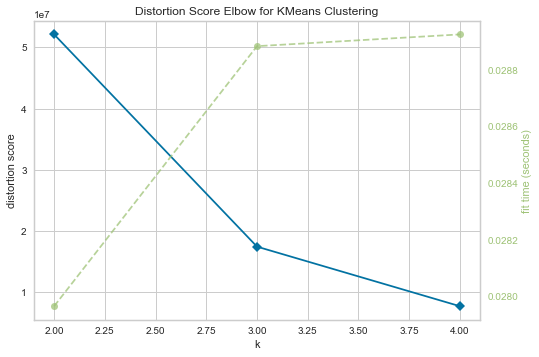

In [54]:
visualizer=KElbowVisualizer(kmeans,k=(2,5))
visualizer.fit(data[['Total ICU Beds']])
visualizer.poof();

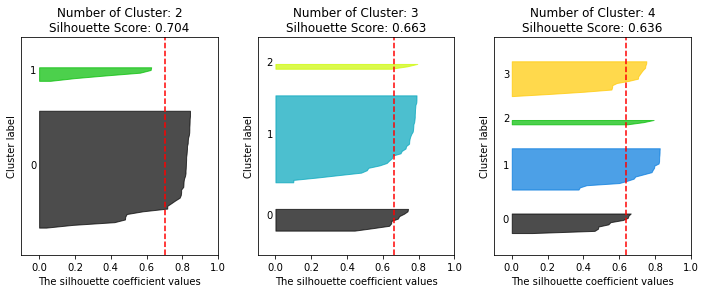

In [44]:
X=data[['Total ICU Beds']]
visualize_silhouette([2,3,4],X)

By silhouette values and visualizations of each, we can find n_clusters of 3 or 4 by *Total Hospital Beds* would be the best clustering.

**(5) Evaluating between n_clusters = 3 and 4**

In [83]:
## n_clusters=3
kmeans=KMeans(n_clusters=3,max_iter=500,random_state=144)
data['cluster_3']=kmeans.fit_predict(data[['Total Hospital Beds']])
data.head(13)

State  LandArea   Density  Population  Total Hospital Beds  \
0       Alabama     50645   97.4271     4934193              14793.0   
1        Alaska    570641    1.2694      724357               1583.0   
2       Arizona    113594   66.2016     7520103              12590.0   
3      Arkansas     52035   58.3059     3033946               8560.0   
4    California    155779  254.2929    39613493              68074.0   
5      Colorado    103642   56.8653     5893634              10335.0   
6   Connecticut      4842  733.7507     3552821               7034.0   
7      Delaware      1949  508.1242      990334               1845.0   
8       Florida     53625  409.2229    21944577              53744.0   
9       Georgia     57513  188.3054    10830007              21861.0   
10       Hawaii      6423  218.9678     1406430               2623.0   
11        Idaho     82643   22.5079     1860123               2265.0   
12     Illinois     55519  226.3967    12569321              25846.0   

    Total ICU Beds  cluster_3  
0           1903.0          1  
1            130.0          1  
2           1702.0          1  
3            908.0          1  
4           8105.0          2  
5           1295.0          1  
6            741.0          1  
7            237.0          1  
8           6433.0          2  
9           2582.0          0  
10           219.0          1  
11           230.0          1  
12          3106.0          0

In [84]:
data['cluster_3'].value_counts()

1    35
0    11
2     4
Name: cluster_3, dtype: int64

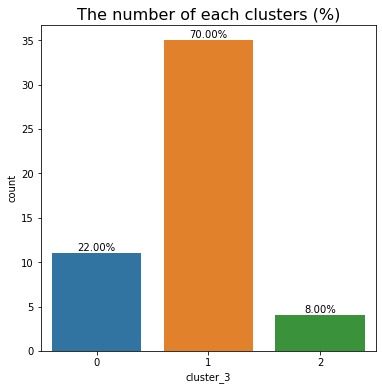

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
g=sns.countplot(x="cluster_3",data=data)
for p in g.patches:
    height=p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
          height+0.3,
          '{:1.2f}%'.format(height/data.shape[0]*100),ha="center",fontsize=10)
g.set_title("The number of each clusters (%)",fontsize=16)
plt.show()

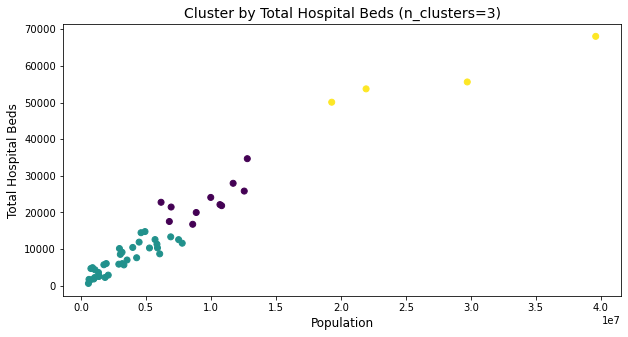

In [88]:
plt.figure(figsize=(10,5))
plt.scatter(x="Population",y="Total Hospital Beds",data=data,c=kmeans.labels_)
plt.xlabel("Population",fontsize=12)
plt.ylabel("Total Hospital Beds",fontsize=12)
plt.title("Cluster by Total Hospital Beds (n_clusters=3)",fontsize=14)

plt.show()

In [69]:
# n_clusters=4
kmeans=KMeans(n_clusters=4,max_iter=500,random_state=144)
data['cluster_4']=kmeans.fit_predict(data[['Total Hospital Beds']])
data.head(13)

State  LandArea   Density  Population  Total Hospital Beds  \
0       Alabama     50645   97.4271     4934193              14793.0   
1        Alaska    570641    1.2694      724357               1583.0   
2       Arizona    113594   66.2016     7520103              12590.0   
3      Arkansas     52035   58.3059     3033946               8560.0   
4    California    155779  254.2929    39613493              68074.0   
5      Colorado    103642   56.8653     5893634              10335.0   
6   Connecticut      4842  733.7507     3552821               7034.0   
7      Delaware      1949  508.1242      990334               1845.0   
8       Florida     53625  409.2229    21944577              53744.0   
9       Georgia     57513  188.3054    10830007              21861.0   
10       Hawaii      6423  218.9678     1406430               2623.0   
11        Idaho     82643   22.5079     1860123               2265.0   
12     Illinois     55519  226.3967    12569321              25846.0   

    Total ICU Beds  cluster_3  cluster_4  
0           1903.0          1          3  
1            130.0          1          1  
2           1702.0          1          3  
3            908.0          1          3  
4           8105.0          2          2  
5           1295.0          1          3  
6            741.0          1          1  
7            237.0          1          1  
8           6433.0          2          2  
9           2582.0          0          0  
10           219.0          1          1  
11           230.0          1          1  
12          3106.0          0          0

In [70]:
data['cluster_4'].value_counts()

1    20
3    17
0     9
2     4
Name: cluster_4, dtype: int64

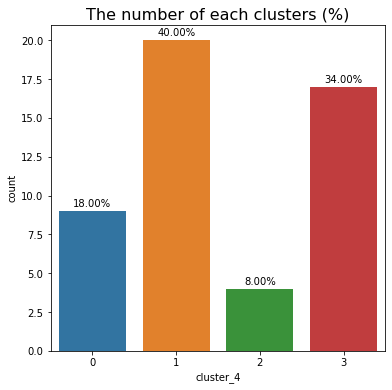

In [71]:
plt.figure(figsize=(6,6))
g=sns.countplot(x="cluster_4",data=data)
for p in g.patches:
    height=p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
          height+0.3,
          '{:1.2f}%'.format(height/data.shape[0]*100),ha="center",fontsize=10)
g.set_title("The number of each clusters (%)",fontsize=16)
plt.show()

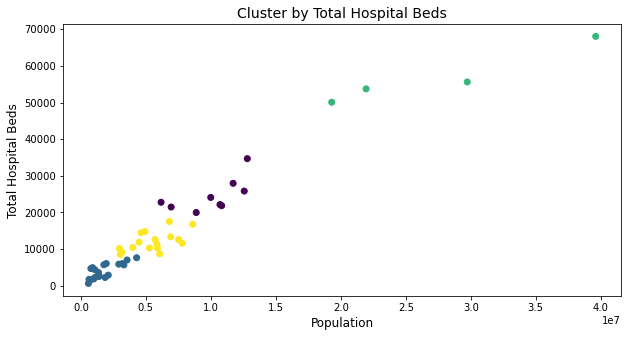

In [73]:
plt.figure(figsize=(10,5))
plt.scatter(x="Population",y="Total Hospital Beds",data=data,c=kmeans.labels_)
plt.xlabel("Population",fontsize=12)
plt.ylabel("Total Hospital Beds",fontsize=12)
plt.title("Cluster by Total Hospital Beds",fontsize=14)
plt.show()

In n_clusters=4, level 0 and 1 are too close to see as "clusters". So we will use n_clusters=3.

In [57]:
# Drop n_cluster=4 column
data.drop(['cluster_4'],axis=1,inplace=True)

In [58]:
# Change "cluster_3" column name into "cluster"
data=data.rename(columns={"cluster_3":"cluster"})

In [59]:
data.head()

State  LandArea   Density  Population  Total Hospital Beds  \
0     Alabama     50645   97.4271     4934193              14793.0   
1      Alaska    570641    1.2694      724357               1583.0   
2     Arizona    113594   66.2016     7520103              12590.0   
3    Arkansas     52035   58.3059     3033946               8560.0   
4  California    155779  254.2929    39613493              68074.0   

   Total ICU Beds  cluster  
0          1903.0        1  
1           130.0        1  
2          1702.0        1  
3           908.0        1  
4          8105.0        2

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State                50 non-null     object 
 1   LandArea             50 non-null     int64  
 2   Density              50 non-null     float64
 3   Population           50 non-null     int64  
 4   Total Hospital Beds  50 non-null     float64
 5   Total ICU Beds       50 non-null     float64
 6   cluster              50 non-null     int32  
dtypes: float64(3), int32(1), int64(2), object(1)
memory usage: 2.7+ KB


In [127]:
data_0_hos=data[data['cluster']==0]['Total Hospital Beds']
data_1_hos=data[data['cluster']==1]['Total Hospital Beds']
data_2_hos=data[data['cluster']==2]['Total Hospital Beds']

print("(Cluster 0) : ",data_0_hos.min()," ~ ",data_0_hos.max())
print("(Cluster 1) : ",data_1_hos.min()," ~ ",data_1_hos.max())
print("(Cluster 2) : ",data_2_hos.min()," ~ ",data_2_hos.max())

(Cluster 0) :  16782.0  ~  34689.0
(Cluster 1) :  633.0  ~  14793.0
(Cluster 2) :  50102.0  ~  68074.0


It's unbalanced cluster, but we'd better use this since this analysis is *not* on whether we can make the best classifier.

> In this section, we clustered data into 3 groups according to total hospital beds. Now, we will see the overall infection speed of Covid-19 in each group and make prediction models respectively.


*Notice*

(beds) cluster_2 > cluster_0 > cluster_1
* cluster=0 : states providing more than 15000 beds
* cluster=1 : states providing less than 15000 beds
* cluster=2 : states providing more than 50000 beds

## 2. EDA on confirmed data

### Load confirmed data (2020.04.13~2021.07.10)

In [93]:
confirmed=pd.read_csv("datasets/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv")
confirmed.head()

UID iso2 iso3  code3    FIPS   Admin2 Province_State Country_Region  \
0  84001001   US  USA    840  1001.0  Autauga        Alabama             US   
1  84001003   US  USA    840  1003.0  Baldwin        Alabama             US   
2  84001005   US  USA    840  1005.0  Barbour        Alabama             US   
3  84001007   US  USA    840  1007.0     Bibb        Alabama             US   
4  84001009   US  USA    840  1009.0   Blount        Alabama             US   

         Lat      Long_  ... 7/1/21  7/2/21  7/3/21  7/4/21  7/5/21  7/6/21  \
0  32.539527 -86.644082  ...   7257    7262    7262    7262    7262    7262   
1  30.727750 -87.722071  ...  22027   22043   22043   22043   22043   22043   
2  31.868263 -85.387129  ...   2346    2347    2347    2347    2347    2347   
3  32.996421 -87.125115  ...   2693    2693    2693    2693    2693    2693   
4  33.982109 -86.567906  ...   6987    6988    6988    6988    6988    6988   

   7/7/21  7/8/21  7/9/21  7/10/21  
0    7277    7277    7294     7299  
1   22154   22154   22220    22267  
2    2354    2354    2361     2365  
3    2699    2699    2699     2702  
4    7013    7013    7018     7023  

[5 rows x 547 columns]

In [94]:
# Drop useless columns
confirmed.drop(['UID','iso2','iso3','code3','FIPS','Admin2','Country_Region','Lat','Long_'],axis=1,inplace=True)

In [95]:
confirmed=confirmed.groupby(['Province_State']).sum()
confirmed.head()

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
Province_State                                                                  
Alabama               0        0        0        0        0        0        0   
Alaska                0        0        0        0        0        0        0   
American Samoa        0        0        0        0        0        0        0   
Arizona               0        0        0        0        1        1        1   
Arkansas              0        0        0        0        0        0        0   

                1/29/20  1/30/20  1/31/20  ...  7/1/21  7/2/21  7/3/21  \
Province_State                             ...                           
Alabama               0        0        0  ...  550983  551298  551298   
Alaska                0        0        0  ...   71275   71384   71384   
American Samoa        0        0        0  ...       0       0       0   
Arizona               1        1        1  ...  895347  895873  896518   
Arkansas              0        0        0  ...  350085  350579  350579   

                7/4/21  7/5/21  7/6/21  7/7/21  7/8/21  7/9/21  7/10/21  
Province_State                                                           
Alabama         551298  551298  551298  552911  552911  554071   554605  
Alaska           71384   71384   71384   71598   71598   71731    71731  
American Samoa       0       0       0       0       0       0        0  
Arizona         896960  897010  897910  898283  898908  899829   900636  
Arkansas        350579  351825  352095  353095  354305  355460   355460  

[5 rows x 536 columns]

In [96]:
# Drop states in confirmed data that doesn't exist in population and hospital data

confirmed.reset_index(inplace=True)

for value in confirmed['Province_State'].values:
    if value in data["State"].values:
        pass
    else:
        index=confirmed[confirmed['Province_State']==value].index
        confirmed.drop(index,axis=0,inplace=True)

In [97]:
confirmed.sort_values(['Province_State'],inplace=True)
confirmed.reset_index(inplace=True)
print(confirmed['Province_State'].values)
print("\n",len(confirmed['Province_State'].values))

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']

 50


In [98]:
confirmed.index=confirmed['Province_State'].values
confirmed.drop(['Province_State'],axis=1,inplace=True)
confirmed.head()

index  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
Alabama         0        0        0        0        0        0        0   
Alaska          1        0        0        0        0        0        0   
Arizona         3        0        0        0        0        1        1   
Arkansas        4        0        0        0        0        0        0   
California      5        0        0        0        0        2        2   

            1/28/20  1/29/20  1/30/20  ...   7/1/21   7/2/21   7/3/21  \
Alabama           0        0        0  ...   550983   551298   551298   
Alaska            0        0        0  ...    71275    71384    71384   
Arizona           1        1        1  ...   895347   895873   896518   
Arkansas          0        0        0  ...   350085   350579   350579   
California        2        2        2  ...  3818326  3819662  3820442   

             7/4/21   7/5/21   7/6/21   7/7/21   7/8/21   7/9/21  7/10/21  
Alabama      551298   551298   551298   552911   552911   554071   554605  
Alaska        71384    71384    71384    71598    71598    71731    71731  
Arizona      896960   897010   897910   898283   898908   899829   900636  
Arkansas     350579   351825   352095   353095   354305   355460   355460  
California  3820921  3821572  3824369  3826508  3829942  3832060  3834068  

[5 rows x 537 columns]

In [99]:
confirmed.drop(["index"],axis=1,inplace=True)

In [100]:
confirmed=confirmed.loc[:,"4/13/20":]

In [101]:
confirmed.head()

4/13/20  4/14/20  4/15/20  4/16/20  4/17/20  4/18/20  4/19/20  \
Alabama        3870     4041     4307     4465     4557     4788     4978   
Alaska          281      289      297      305      314      319      324   
Arizona        3705     3809     3964     4237     4511     4724     4933   
Arkansas       1410     1498     1569     1620     1695     1744     1781   
California    23959    25460    26719    27687    29470    30805    31660   

            4/20/20  4/21/20  4/22/20  ...   7/1/21   7/2/21   7/3/21  \
Alabama        5163     5404     5692  ...   550983   551298   551298   
Alaska          326      334      340  ...    71275    71384    71384   
Arizona        5068     5256     5473  ...   895347   895873   896518   
Arkansas       1973     1990     2276  ...   350085   350579   350579   
California    33946    35793    37739  ...  3818326  3819662  3820442   

             7/4/21   7/5/21   7/6/21   7/7/21   7/8/21   7/9/21  7/10/21  
Alabama      551298   551298   551298   552911   552911   554071   554605  
Alaska        71384    71384    71384    71598    71598    71731    71731  
Arizona      896960   897010   897910   898283   898908   899829   900636  
Arkansas     350579   351825   352095   353095   354305   355460   355460  
California  3820921  3821572  3824369  3826508  3829942  3832060  3834068  

[5 rows x 454 columns]

In [102]:
confirmed["cluster"]=data["cluster"].values

In [103]:
confirmed.head(13)

4/13/20  4/14/20  4/15/20  4/16/20  4/17/20  4/18/20  4/19/20  \
Alabama         3870     4041     4307     4465     4557     4788     4978   
Alaska           281      289      297      305      314      319      324   
Arizona         3705     3809     3964     4237     4511     4724     4933   
Arkansas        1410     1498     1569     1620     1695     1744     1781   
California     23959    25460    26719    27687    29470    30805    31660   
Colorado        7696     7950     8280     8675     9047     9440     9730   
Connecticut    13381    13989    14755    15884    16809    17550    17962   
Delaware        1758     1926     2014     2070     2317     2538     2538   
Florida        21019    21628    22511    23343    24759    25492    26314   
Georgia        13315    14578    14987    15669    17194    17669    18301   
Hawaii           504      511      524      530      541      574      580   
Idaho           1426     1464     1473     1587     1609     1655     1668   
Illinois       22025    23248    24593    25734    27578    29160    30357   

             4/20/20  4/21/20  4/22/20  ...   7/2/21   7/3/21   7/4/21  \
Alabama         5163     5404     5692  ...   551298   551298   551298   
Alaska           326      334      340  ...    71384    71384    71384   
Arizona         5068     5256     5473  ...   895873   896518   896960   
Arkansas        1973     1990     2276  ...   350579   350579   350579   
California     33946    35793    37739  ...  3819662  3820442  3820921   
Colorado       10112    10473    10891  ...   558820   559272   559534   
Connecticut    19815    20360    22469  ...   349476   349476   349476   
Delaware        2745     2931     3200  ...   109820   109846   109875   
Florida        27059    27869    28309  ...  2381148  2381148  2381148   
Georgia        19407    19881    21214  ...  1135526  1135526  1135526   
Hawaii           584      586      592  ...    37886    37933    37995   
Idaho           1672     1736     1766  ...   195172   195172   195172   
Illinois       31513    33059    35107  ...  1392552  1392552  1392552   

              7/5/21   7/6/21   7/7/21   7/8/21   7/9/21  7/10/21  cluster  
Alabama       551298   551298   552911   552911   554071   554605        1  
Alaska         71384    71384    71598    71598    71731    71731        1  
Arizona       897010   897910   898283   898908   899829   900636        1  
Arkansas      351825   352095   353095   354305   355460   355460        1  
California   3821572  3824369  3826508  3829942  3832060  3834068        2  
Colorado      559704   559921   560419   560860   561912   562401        1  
Connecticut   349476   349651   349743   349798   349969   349969        1  
Delaware      109891   109900   109900   109931   109986   110019        1  
Florida      2381148  2381148  2381148  2381148  2404895  2404895        2  
Georgia      1135526  1136893  1137560  1138492  1139396  1139396        0  
Hawaii         38043    38082    38121    38196    38265    38379        1  
Idaho         195172   195429   195552   195696   195831   195831        1  
Illinois     1392552  1393773  1394235  1394852  1395497  1395497        0  

[13 rows x 455 columns]

In [104]:
# Missing data
confirmed.isna().sum(axis=1)

Alabama           0
Alaska            0
Arizona           0
Arkansas          0
California        0
Colorado          0
Connecticut       0
Delaware          0
Florida           0
Georgia           0
Hawaii            0
Idaho             0
Illinois          0
Indiana           0
Iowa              0
Kansas            0
Kentucky          0
Louisiana         0
Maine             0
Maryland          0
Massachusetts     0
Michigan          0
Minnesota         0
Mississippi       0
Missouri          0
Montana           0
Nebraska          0
Nevada            0
New Hampshire     0
New Jersey        0
New Mexico        0
New York          0
North Carolina    0
North Dakota      0
Ohio              0
Oklahoma          0
Oregon            0
Pennsylvania      0
Rhode Island      0
South Carolina    0
South Dakota      0
Tennessee         0
Texas             0
Utah              0
Vermont           0
Virginia          0
Washington        0
West Virginia     0
Wisconsin         0
Wyoming           0


I didn't merge datasets here.

In [105]:
# Delete Date
# confirmed_1=confirmed.loc[:,"4/13/20":].T
# confirmed_1.reset_index(inplace=True,drop=True)
# confirmed_1=confirmed_1.T

In [106]:
# confirmed_1.head()

In [107]:
# Merge confirmed data with population & hospital data
# data=pd.merge(data,confirmed_1,left_index=True,right_index=True)
# data.shape

In [108]:
# data.head()

In [109]:
# Adding state names as index & adding cluster column to confirmed data
# confirmed_1.index=data["State"].values
# confirmed_1["cluster"]=data['cluster'].values
# confirmed_1.head()

In [110]:
# confirmed_1.reset_index(inplace=True)
# confirmed_1=confirmed_1.rename(columns={"index":"State"})
# confirmed_1.head()

### Grouping confirmed data by cluster label

In [111]:
# Making new dataframes by each cluster labels
confirmed_0=confirmed[confirmed['cluster']==0]
confirmed_1=confirmed[confirmed['cluster']==1]
confirmed_2=confirmed[confirmed['cluster']==2]

In [112]:
confirmed_0.tail()

4/13/20  4/14/20  4/15/20  4/16/20  4/17/20  4/18/20  4/19/20  \
North Carolina     5024     5195     5484     5877     6171     6524     6818   
Ohio               6975     7285     7794     8414     9107    10222    11602   
Pennsylvania      24336    25502    26792    28284    29950    31689    32905   
Tennessee          5610     5827     5827     6166     6263     6589     7070   
Virginia           5747     6182     6500     6889     7491     8053     8542   

                4/20/20  4/21/20  4/22/20  ...   7/2/21   7/3/21   7/4/21  \
North Carolina     7033     7331     7728  ...  1014359  1014359  1014359   
Ohio              12919    13725    14117  ...  1112088  1112289  1112289   
Pennsylvania      33909    35253    36138  ...  1217115  1217288  1217389   
Tennessee          7238     7394     7394  ...   867407   867407   867407   
Virginia           8990     9630    10266  ...   680744   680904   681072   

                 7/5/21   7/6/21   7/7/21   7/8/21   7/9/21  7/10/21  cluster  
North Carolina  1014359  1015847  1016262  1016892  1017435  1017435        0  
Ohio            1112499  1112689  1113006  1113383  1113737  1114036        0  
Pennsylvania    1217484  1217567  1217707  1218097  1218291  1218490        0  
Tennessee        867407   868322   868738   869191   869752   869752        0  
Virginia         681194   681326   681599   681890   682147   682433        0  

[5 rows x 455 columns]

In [113]:
# Drop cluster column
confirmed_0.drop(['cluster'],axis=1,inplace=True)
confirmed_1.drop(['cluster'],axis=1,inplace=True)
confirmed_2.drop(['cluster'],axis=1,inplace=True)

C:\Users\CHOI\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [114]:
confirmed_0_states=confirmed_0.index.values
confirmed_1_states=confirmed_1.index.values
confirmed_2_states=confirmed_2.index.values
print("States (cluster=0): ",len(confirmed_0_states),"\n",confirmed_0_states)
print("States (cluster=1): ",len(confirmed_1_states),"\n",confirmed_1_states)
print("States (cluster=2): ",len(confirmed_2_states),"\n",confirmed_2_states)

States (cluster=0):  11 
 ['Georgia' 'Illinois' 'Indiana' 'Michigan' 'Missouri' 'New Jersey'
 'North Carolina' 'Ohio' 'Pennsylvania' 'Tennessee' 'Virginia']
States (cluster=1):  35 
 ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'Colorado' 'Connecticut'
 'Delaware' 'Hawaii' 'Idaho' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana'
 'Maine' 'Maryland' 'Massachusetts' 'Minnesota' 'Mississippi' 'Montana'
 'Nebraska' 'Nevada' 'New Hampshire' 'New Mexico' 'North Dakota'
 'Oklahoma' 'Oregon' 'Rhode Island' 'South Carolina' 'South Dakota' 'Utah'
 'Vermont' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']
States (cluster=2):  4 
 ['California' 'Florida' 'New York' 'Texas']


In [115]:
confirmed_0.head()

4/13/20  4/14/20  4/15/20  4/16/20  4/17/20  4/18/20  4/19/20  \
Georgia     13315    14578    14987    15669    17194    17669    18301   
Illinois    22025    23248    24593    25734    27578    29160    30357   
Indiana      8359     8527     8960     9542    10154    10641    11211   
Michigan    26622    28042    29144    29966    31225    32031    32688   
Missouri     4759     4932     5070     5376     5596     5784     5920   

          4/20/20  4/21/20  4/22/20  ...   7/1/21   7/2/21   7/3/21   7/4/21  \
Georgia     19407    19881    21214  ...  1135093  1135526  1135526  1135526   
Illinois    31513    33059    35107  ...  1392196  1392552  1392552  1392552   
Indiana     11688    12097    12438  ...   754317   754724   754724   754724   
Michigan    33324    34048    35404  ...  1000241  1000375  1000375  1000375   
Missouri     6083     6312     6516  ...   627082   628255   628484   629742   

           7/5/21   7/6/21   7/7/21   7/8/21   7/9/21  7/10/21  
Georgia   1135526  1136893  1137560  1138492  1139396  1139396  
Illinois  1392552  1393773  1394235  1394852  1395497  1395497  
Indiana    754724   755700   756070   756625   757062   757062  
Michigan  1000375  1000908  1000908  1000908  1001745  1001745  
Missouri   630744   631510   633169   634834   636976   638573  

[5 rows x 454 columns]

In [116]:
confirmed_1.head()

4/13/20  4/14/20  4/15/20  4/16/20  4/17/20  4/18/20  4/19/20  \
Alabama      3870     4041     4307     4465     4557     4788     4978   
Alaska        281      289      297      305      314      319      324   
Arizona      3705     3809     3964     4237     4511     4724     4933   
Arkansas     1410     1498     1569     1620     1695     1744     1781   
Colorado     7696     7950     8280     8675     9047     9440     9730   

          4/20/20  4/21/20  4/22/20  ...  7/1/21  7/2/21  7/3/21  7/4/21  \
Alabama      5163     5404     5692  ...  550983  551298  551298  551298   
Alaska        326      334      340  ...   71275   71384   71384   71384   
Arizona      5068     5256     5473  ...  895347  895873  896518  896960   
Arkansas     1973     1990     2276  ...  350085  350579  350579  350579   
Colorado    10112    10473    10891  ...  558321  558820  559272  559534   

          7/5/21  7/6/21  7/7/21  7/8/21  7/9/21  7/10/21  
Alabama   551298  551298  552911  552911  554071   554605  
Alaska     71384   71384   71598   71598   71731    71731  
Arizona   897010  897910  898283  898908  899829   900636  
Arkansas  351825  352095  353095  354305  355460   355460  
Colorado  559704  559921  560419  560860  561912   562401  

[5 rows x 454 columns]

In [117]:
confirmed_2.head()

4/13/20  4/14/20  4/15/20  4/16/20  4/17/20  4/18/20  4/19/20  \
California    23959    25460    26719    27687    29470    30805    31660   
Florida       21019    21628    22511    23343    24759    25492    26314   
New York     208488   215959   222617   230506   237492   244369   251013   
Texas         14328    15088    16044    16985    17925    18724    19282   

            4/20/20  4/21/20  4/22/20  ...   7/1/21   7/2/21   7/3/21  \
California    33946    35793    37739  ...  3818326  3819662  3820442   
Florida       27059    27869    28309  ...  2365464  2381148  2381148   
New York     257399   262032   266291  ...  2115377  2115880  2116166   
Texas         19847    20785    21577  ...  3001682  3003278  3004465   

             7/4/21   7/5/21   7/6/21   7/7/21   7/8/21   7/9/21  7/10/21  
California  3820921  3821572  3824369  3826508  3829942  3832060  3834068  
Florida     2381148  2381148  2381148  2381148  2381148  2404895  2404895  
New York    2116516  2116888  2117186  2117549  2118216  2118960  2119692  
Texas       3004684  3005221  3006541  3010929  3013216  3015520  3016891  

[4 rows x 454 columns]

### Plotting each of the clusters

* cluster=0 : states providing more than 15000 beds
* cluster=1 : states providing less than 15000 beds
* cluster=2 : states providing more than 50000 beds

**(1) cluster=0**

In [118]:
confirmed_0=confirmed_0.T

In [119]:
confirmed_0.reset_index(drop=True,inplace=True)

In [120]:
confirmed_0.tail()

Georgia  Illinois  Indiana  Michigan  Missouri  New Jersey  \
449  1136893   1393773   755700   1000908    631510     1024465   
450  1137560   1394235   756070   1000908    633169     1024748   
451  1138492   1394852   756625   1000908    634834     1025079   
452  1139396   1395497   757062   1001745    636976     1025477   
453  1139396   1395497   757062   1001745    638573     1025788   

     North Carolina     Ohio  Pennsylvania  Tennessee  Virginia  
449         1015847  1112689       1217567     868322    681326  
450         1016262  1113006       1217707     868738    681599  
451         1016892  1113383       1218097     869191    681890  
452         1017435  1113737       1218291     869752    682147  
453         1017435  1114036       1218490     869752    682433

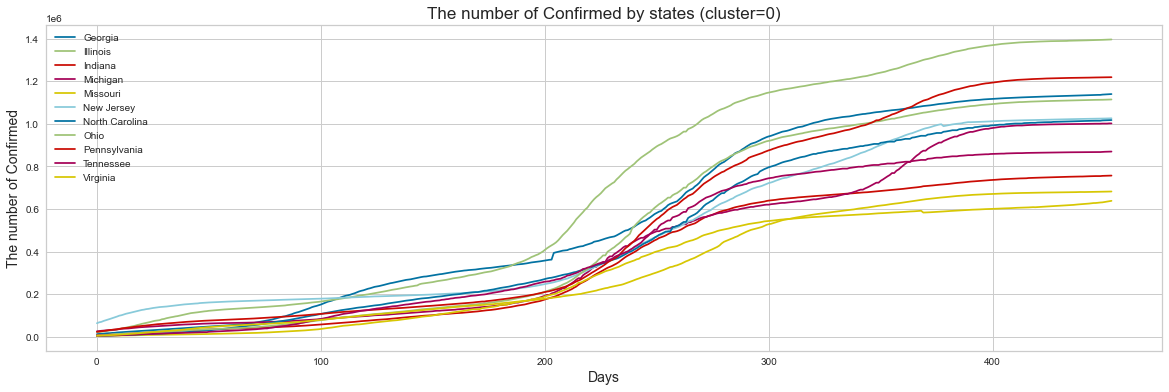

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(20,6))
for value in confirmed_0_states:
    plt.plot(confirmed_0[[value]],label=value)
    
plt.legend()
plt.xlabel("Days",fontsize=14)
plt.ylabel("The number of Confirmed",fontsize=14)
plt.title("The number of Confirmed by states (cluster=0)",fontsize=17)
plt.show()

**(2) cluster=1**

In [121]:
confirmed_1=confirmed_1.T
confirmed_1.reset_index(drop=True,inplace=True)
confirmed_1.head()

Alabama  Alaska  Arizona  Arkansas  Colorado  Connecticut  Delaware  \
0     3870     281     3705      1410      7696        13381      1758   
1     4041     289     3809      1498      7950        13989      1926   
2     4307     297     3964      1569      8280        14755      2014   
3     4465     305     4237      1620      8675        15884      2070   
4     4557     314     4511      1695      9047        16809      2317   

   Hawaii  Idaho  Iowa  ...  Oregon  Rhode Island  South Carolina  \
0     504   1426  1710  ...    1584          2665            3391   
1     511   1464  1899  ...    1633          3251            3553   
2     524   1473  1995  ...    1663          3251            3656   
3     530   1587  2141  ...    1736          3529            3931   
4     541   1609  2332  ...    1785          4177            4099   

   South Dakota  Utah  Vermont  Washington  West Virginia  Wisconsin  Wyoming  
0           868  2363      748       10635            611       3428      275  
1           988  2417      752       10799            640       3555      282  
2          1168  2548      759       10942            702       3721      287  
3          1311  2683      774       11057            728       3875      296  
4          1411  2793      779       11517            775       4053      305  

[5 rows x 35 columns]

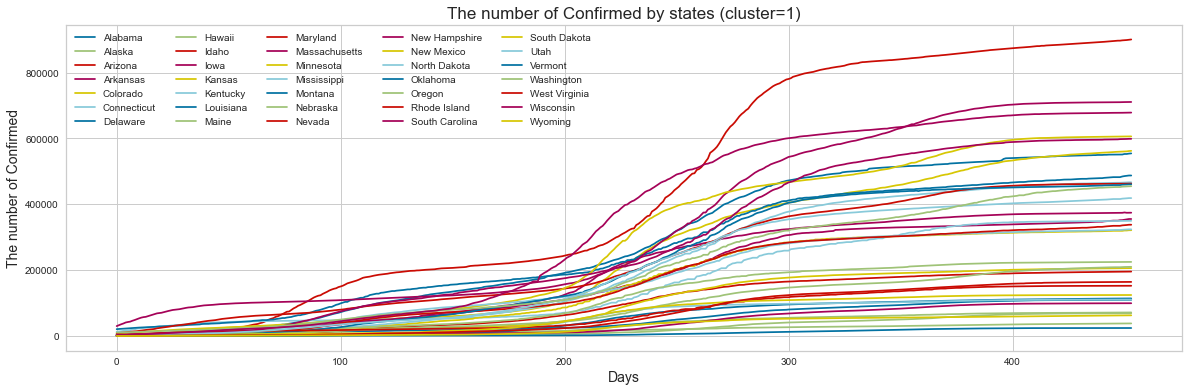

In [101]:
plt.figure(figsize=(20,6))

for value in confirmed_1_states:
    plt.plot(confirmed_1[[value]],label=value)

plt.legend(loc="upper left",ncol=5)
plt.xlabel("Days",fontsize=14)
plt.ylabel("The number of Confirmed",fontsize=14)
plt.title("The number of Confirmed by states (cluster=1)",fontsize=17)
plt.show()

**(2) cluster=2**

In [122]:
confirmed_2=confirmed_2.T
confirmed_2.reset_index(drop=True,inplace=True)
confirmed_2.head()

California  Florida  New York  Texas
0       23959    21019    208488  14328
1       25460    21628    215959  15088
2       26719    22511    222617  16044
3       27687    23343    230506  16985
4       29470    24759    237492  17925

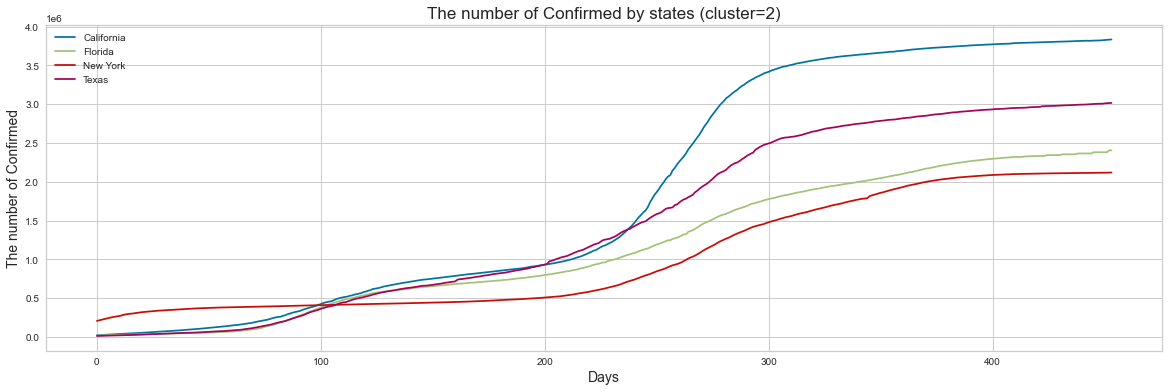

In [103]:
plt.figure(figsize=(20,6))

for value in confirmed_2_states:
    plt.plot(confirmed_2[[value]],label=value)

plt.legend()
plt.xlabel("Days",fontsize=14)
plt.ylabel("The number of Confirmed",fontsize=14)
plt.title("The number of Confirmed by states (cluster=2)",fontsize=17)
plt.show()

### Plotting infection percentage by dividing the confirmed data into population

Because of population difference, I think using the percentage of confirmed cases per population would be more reasonable in this analysis.

* cluster=0 : states providing more than 15000 beds
* cluster=1 : states providing less than 15000 beds
* cluster=2 : states providing more than 50000 beds

In [123]:
conper_0=(confirmed_0.T/data[data['cluster']==0][["Population"]].values*100).T
conper_1=(confirmed_1.T/data[data['cluster']==1][["Population"]].values*100).T
conper_2=(confirmed_2.T/data[data['cluster']==2][["Population"]].values*100).T

In [124]:
conper_0.head()

Georgia  Illinois   Indiana  Michigan  Missouri  New Jersey  \
0  0.122945  0.175228  0.122824  0.266422  0.077143    0.727746   
1  0.134607  0.184958  0.125293  0.280633  0.079948    0.775524   
2  0.138384  0.195659  0.131655  0.291661  0.082185    0.800381   
3  0.144681  0.204737  0.140207  0.299887  0.087145    0.848688   
4  0.158763  0.219407  0.149199  0.312487  0.090711    0.884183   

   North Carolina      Ohio  Pennsylvania  Tennessee  Virginia  
0        0.046949  0.059541      0.190064   0.080786  0.066795  
1        0.048547  0.062187      0.199170   0.083911  0.071850  
2        0.051247  0.066532      0.209245   0.083911  0.075546  
3        0.054920  0.071825      0.220898   0.088793  0.080068  
4        0.057667  0.077740      0.233909   0.090190  0.087064

**(1) cluster=0**

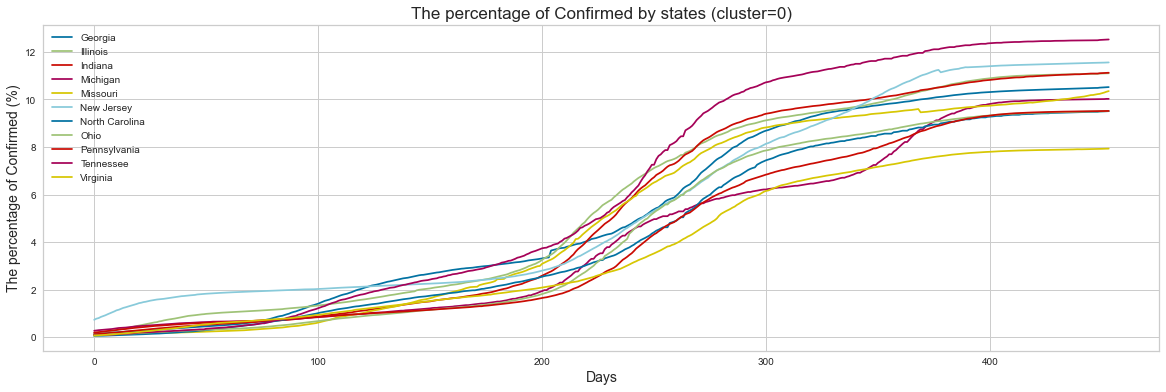

In [106]:
plt.figure(figsize=(20,6))

for value in confirmed_0_states:
    plt.plot(conper_0[[value]],label=value)

plt.legend()
plt.xlabel("Days",fontsize=14)
plt.ylabel("The percentage of Confirmed (%)",fontsize=14)
plt.title("The percentage of Confirmed by states (cluster=0)",fontsize=17)
plt.show()

In states providing more than 15000 beds, we can find the most confirmed cumulative percentage is approximately 12%.

**(2) cluster=1**

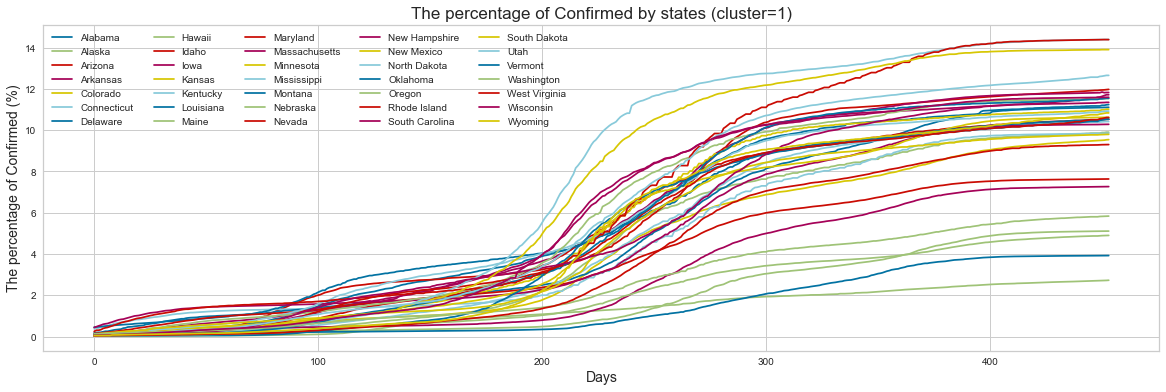

In [107]:
plt.figure(figsize=(20,6))

for value in confirmed_1_states:
    plt.plot(conper_1[[value]],label=value)

plt.legend(loc="upper left",ncol=5)
plt.xlabel("Days",fontsize=14)
plt.ylabel("The percentage of Confirmed (%)",fontsize=14)
plt.title("The percentage of Confirmed by states (cluster=1)",fontsize=17)
plt.show()

In states providing less than 15000 beds, we can find the most confirmed cumulative percentage is approximately 14%.

**(3) cluster=2**

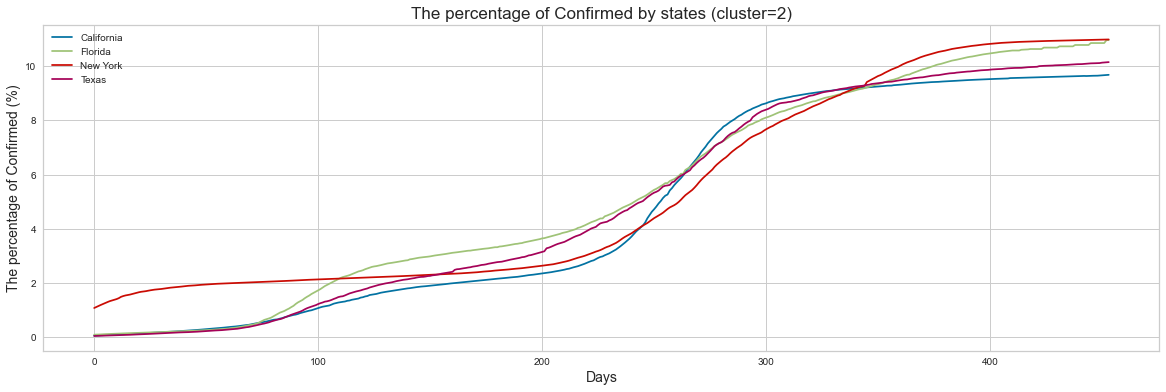

In [108]:
plt.figure(figsize=(20,6))

for value in confirmed_2_states:
    plt.plot(conper_2[[value]],label=value)

plt.legend()
plt.xlabel("Days",fontsize=14)
plt.ylabel("The percentage of Confirmed (%)",fontsize=14)
plt.title("The percentage of Confirmed by states (cluster=2)",fontsize=17)
plt.show()

In states providing more than 50000 beds, we can find the most confirmed cumulative percentage is approximately 10%.

By the overall cumulative confirmed data, we can conclude that the more total hospital beds are provided, the less confirmed cases occurs. However, to be more specific, I'll check treemaps each of the states' hospital beds and the latest culumative confirmed percentage data.

**(1) cluster=0**

In [125]:
conper_0.shape

(454, 11)

In [128]:
Hosper_0=pd.DataFrame(data_0_hos.values,conper_0.iloc[453,:].values)
Hosper_0.reset_index(inplace=True)
Hosper_0.rename(columns={"index":"Percentage",0:"Total Hospital Beds"},inplace=True)
Hosper_0['State']=conper_0.columns.values
Hosper_0.head()

Percentage  Total Hospital Beds     State
0   10.520732              21861.0   Georgia
1   11.102406              25846.0  Illinois
2   11.124001              17546.0   Indiana
3   10.025042              24112.0  Michigan
4   10.351257              22788.0  Missouri

In [129]:
import plotly.express as px

tr1=px.treemap(Hosper_0,path=['State'],values="Total Hospital Beds",color="Percentage",color_continuous_scale="dense",
               hover_data=["State"],title="Beds/Percentage in different states (Cluster=0)")
tr1.show()

By cluster_0 treemap, we can find that the overall percentage of confirmed cases becomes higher as the provided hospital beds are less in each states in cluster_0, though there are exception of Virginia which we can't ignore.

**(2) cluster=1**

In [130]:
Hosper_1=pd.DataFrame(data_1_hos.values,conper_1.iloc[453,:].values)
Hosper_1.reset_index(inplace=True)
Hosper_1.rename(columns={"index":"Percentage",0:"Total Hospital Beds"},inplace=True)
Hosper_1['State']=conper_1.columns.values
Hosper_1.head()

Percentage  Total Hospital Beds     State
0   11.240035              14793.0   Alabama
1    9.902714               1583.0    Alaska
2   11.976379              12590.0   Arizona
3   11.716095               8560.0  Arkansas
4    9.542517              10335.0  Colorado

In [131]:
tr2=px.treemap(Hosper_1,path=['State'],values="Total Hospital Beds",color="Percentage",color_continuous_scale="dense",
               hover_data=["State"],title="Beds/Percentage in different states (Cluster=1)")
tr2.show()

By some specific states like South Dakota, North Dakota and Rhode Island, we can assume that, in this cluster, the total hospital beds may give a little bit influence to the confirmed percentage.

**(3) cluster=2**

In [132]:
Hosper_2=pd.DataFrame(data_2_hos.values,conper_2.iloc[453,:].values)
Hosper_2.reset_index(inplace=True)
Hosper_2.rename(columns={"index":"Percentage",0:"Total Hospital Beds"},inplace=True)
Hosper_2['State']=conper_2.columns.values
Hosper_2.head()

Percentage  Total Hospital Beds       State
0    9.678692              68074.0  California
1   10.958949              53744.0     Florida
2   10.982871              50102.0    New York
3   10.147526              55629.0       Texas

In [133]:
tr3=px.treemap(Hosper_2,path=['State'],values="Total Hospital Beds",color="Percentage",color_continuous_scale="dense",
               hover_data=["State"],title="Beds/Percentage in different states (Cluster=2)")
tr3.show()

We can find a distinct relationship between the total hospital beds and confirmed percentage in cluster_2.

By this process, we can confirm there are correlation between total hospital beds and confirmed percentage in and on clusters respectively.

I'll use this data in making prediction models.

### Plotting statistical values of confirmed percentage by clusters

**(1) mean value**

In [134]:
# Making new dataframe named "mean_per" which shows mean value of percentage in each clusters
mean_per=pd.DataFrame(conper_0.apply(sum,axis=1)/conper_0.shape[1],columns=["Cluster_0"])
mean_per['Cluster_1']=conper_1.apply(sum,axis=1)/conper_1.shape[1]
mean_per['Cluster_2']=conper_2.apply(sum,axis=1)/conper_2.shape[1]

In [135]:
mean_per.head()

Cluster_0  Cluster_1  Cluster_2
0   0.176040   0.105471   0.321177
1   0.186057   0.111854   0.333134
2   0.193310   0.117415   0.344363
3   0.203804   0.123601   0.356932
4   0.214666   0.131911   0.369510

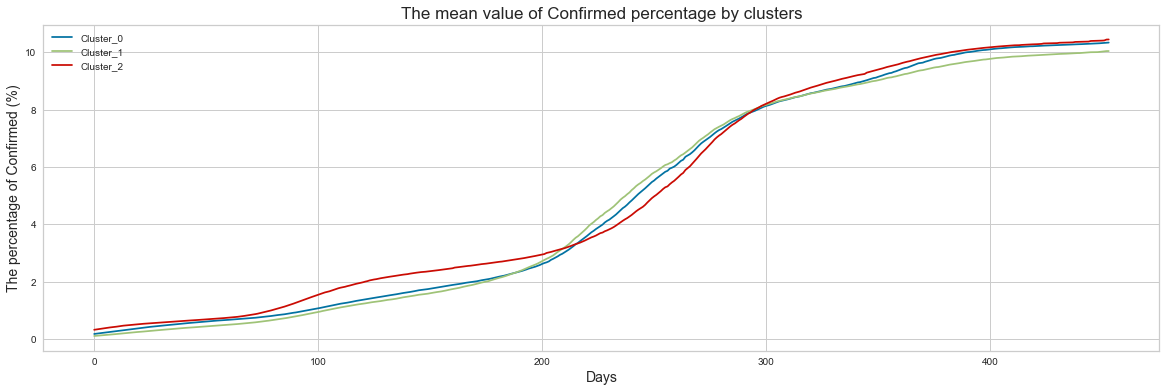

In [118]:
plt.figure(figsize=(20,6))

for value in mean_per.columns.values:
    plt.plot(mean_per[[value]],label=value)

plt.legend()
plt.xlabel("Days",fontsize=14)
plt.ylabel("The percentage of Confirmed (%)",fontsize=14)
plt.title("The mean value of Confirmed percentage by clusters",fontsize=17)
plt.show()

Making clusters may not be useful if we make prediction models in mean value.

**(2) median value**

In [136]:
# Making new dataframe named "mean_per" which shows median value of percentage in each clusters
median_per=pd.DataFrame(conper_0.T.median(),columns=["Cluster_0"])
median_per['Cluster_1']=conper_1.T.median()
median_per['Cluster_2']=conper_2.T.median()

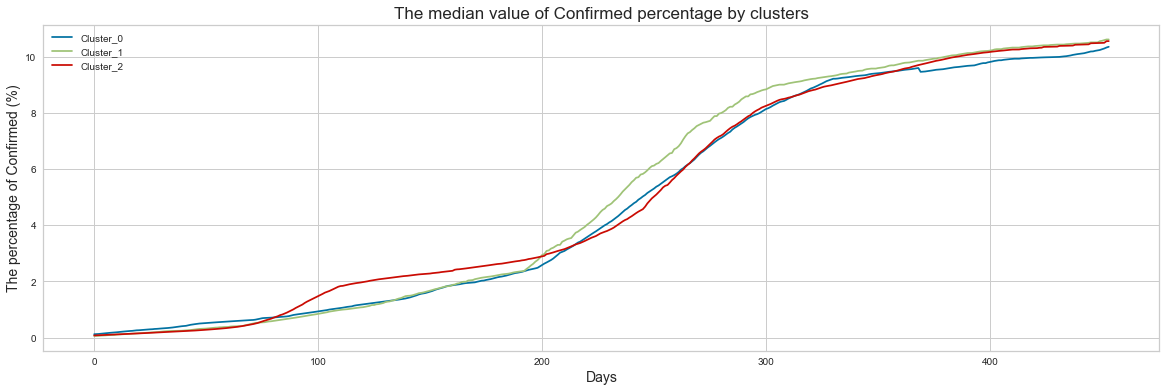

In [120]:
plt.figure(figsize=(20,6))

for value in median_per.columns.values:
    plt.plot(median_per[[value]],label=value)

plt.legend()
plt.xlabel("Days",fontsize=14)
plt.ylabel("The percentage of Confirmed (%)",fontsize=14)
plt.title("The median value of Confirmed percentage by clusters",fontsize=17)
plt.show()

We can find that clustering would be useless if we make model using statistical values.

## 3. Correlation

### (1) Not caring cluster

### Making new dataframe containing population, beds and percentage data

In [137]:
# Making confirmed percentage data named "percentage"
percentage=confirmed.drop(['cluster'],axis=1)
percentage=percentage.T.reset_index(drop=True)

In [138]:
for value in percentage.columns.values:
    percentage[value]=np.round(percentage[value]/data[data["State"]==value]["Population"].values,4)

In [139]:
percentage=percentage.T
percentage.head()

0       1       2       3       4       5       6       7    \
Alabama     0.0008  0.0008  0.0009  0.0009  0.0009  0.0010  0.0010  0.0010   
Alaska      0.0004  0.0004  0.0004  0.0004  0.0004  0.0004  0.0004  0.0005   
Arizona     0.0005  0.0005  0.0005  0.0006  0.0006  0.0006  0.0007  0.0007   
Arkansas    0.0005  0.0005  0.0005  0.0005  0.0006  0.0006  0.0006  0.0007   
California  0.0006  0.0006  0.0007  0.0007  0.0007  0.0008  0.0008  0.0009   

               8       9    ...     444     445     446     447     448  \
Alabama     0.0011  0.0012  ...  0.1117  0.1117  0.1117  0.1117  0.1117   
Alaska      0.0005  0.0005  ...  0.0984  0.0985  0.0985  0.0985  0.0985   
Arizona     0.0007  0.0007  ...  0.1191  0.1191  0.1192  0.1193  0.1193   
Arkansas    0.0007  0.0008  ...  0.1154  0.1156  0.1156  0.1156  0.1160   
California  0.0009  0.0010  ...  0.0964  0.0964  0.0964  0.0965  0.0965   

               449     450     451     452     453  
Alabama     0.1117  0.1121  0.1121  0.1123  0.1124  
Alaska      0.0985  0.0988  0.0988  0.0990  0.0990  
Arizona     0.1194  0.1195  0.1195  0.1197  0.1198  
Arkansas    0.1161  0.1164  0.1168  0.1172  0.1172  
California  0.0965  0.0966  0.0967  0.0967  0.0968  

[5 rows x 454 columns]

In [140]:
percentage.reset_index(drop=True,inplace=True)

In [141]:
# Making dataframe containing confirmed percentage of all days named "final_data_1"
final_data_1=pd.merge(data,percentage,left_index=True,right_index=True)
final_data_1.drop(["cluster"],axis=1,inplace=True)
final_data_1.head()

State  LandArea   Density  Population  Total Hospital Beds  \
0     Alabama     50645   97.4271     4934193              14793.0   
1      Alaska    570641    1.2694      724357               1583.0   
2     Arizona    113594   66.2016     7520103              12590.0   
3    Arkansas     52035   58.3059     3033946               8560.0   
4  California    155779  254.2929    39613493              68074.0   

   Total ICU Beds       0       1       2       3  ...     444     445  \
0          1903.0  0.0008  0.0008  0.0009  0.0009  ...  0.1117  0.1117   
1           130.0  0.0004  0.0004  0.0004  0.0004  ...  0.0984  0.0985   
2          1702.0  0.0005  0.0005  0.0005  0.0006  ...  0.1191  0.1191   
3           908.0  0.0005  0.0005  0.0005  0.0005  ...  0.1154  0.1156   
4          8105.0  0.0006  0.0006  0.0007  0.0007  ...  0.0964  0.0964   

      446     447     448     449     450     451     452     453  
0  0.1117  0.1117  0.1117  0.1117  0.1121  0.1121  0.1123  0.1124  
1  0.0985  0.0985  0.0985  0.0985  0.0988  0.0988  0.0990  0.0990  
2  0.1192  0.1193  0.1193  0.1194  0.1195  0.1195  0.1197  0.1198  
3  0.1156  0.1156  0.1160  0.1161  0.1164  0.1168  0.1172  0.1172  
4  0.0964  0.0965  0.0965  0.0965  0.0966  0.0967  0.0967  0.0968  

[5 rows x 460 columns]

In [142]:
# Making dataframe named "latest_data_1" containing confirmed percentage only on the latest day for calculating correlation better
latest_data_1=pd.merge(data,percentage[[453]],left_index=True,right_index=True)
latest_data_1.drop(['cluster'],axis=1,inplace=True)
latest_data_1.rename(columns={453:"Confirmed(%)"},inplace=True)
latest_data_1.head()

State  LandArea   Density  Population  Total Hospital Beds  \
0     Alabama     50645   97.4271     4934193              14793.0   
1      Alaska    570641    1.2694      724357               1583.0   
2     Arizona    113594   66.2016     7520103              12590.0   
3    Arkansas     52035   58.3059     3033946               8560.0   
4  California    155779  254.2929    39613493              68074.0   

   Total ICU Beds  Confirmed(%)  
0          1903.0        0.1124  
1           130.0        0.0990  
2          1702.0        0.1198  
3           908.0        0.1172  
4          8105.0        0.0968

### Correlation between population, hospital beds and confirmed percentage data

In [143]:
# Scaling
from sklearn.preprocessing import MaxAbsScaler

scaler=MaxAbsScaler()
latest_data_1=latest_data_1.drop(['State'],axis=1)
latest_data_1[latest_data_1.columns.values[:]]=scaler.fit_transform(latest_data_1[latest_data_1.columns.values[:]])

<AxesSubplot:>

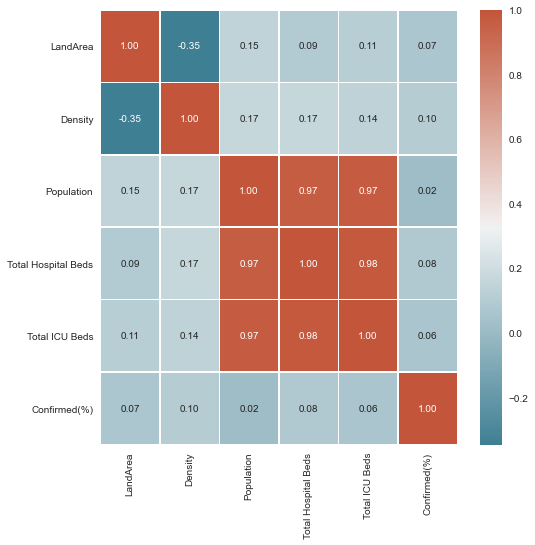

In [128]:
plt.figure(figsize=(8,8))
sns.heatmap(data=latest_data_1.corr(),annot=True,fmt=".2f",linewidths=.5,cmap=sns.diverging_palette(220,20,as_cmap=True))

> Because the correlation between total hospital, ICU beds and confirmed population merely exists. Also, though there might be a little bit relationship, that's positive correlation, which rejects our first hypothesis (The more beds exist, the less confirmed percentage is.). So we will look at the correlation of data clustered by total hospital beds.

### (2) Caring cluster

### Making new dataframe containing population, beds and percentage data

In [144]:
# Making dataframe containing confirmed percentage of all days named "final_data_1"
final_data_2=pd.merge(data,percentage,left_index=True,right_index=True)
final_data0=final_data_2[final_data_2['cluster']==0]
final_data1=final_data_2[final_data_2['cluster']==1]
final_data2=final_data_2[final_data_2['cluster']==2]

In [145]:
# Making dataframe named "latest_data_1" containing confirmed percentage only on the latest day for calculating correlation better
latest_data_2=pd.merge(data,percentage[[453]],left_index=True,right_index=True)
latest_data_2.rename(columns={453:"Confirmed(%)"},inplace=True)
latest_data0=latest_data_2[latest_data_2['cluster']==0]
latest_data1=latest_data_2[latest_data_2['cluster']==1]
latest_data2=latest_data_2[latest_data_2['cluster']==2]

**(1) cluster = 0**

<AxesSubplot:>

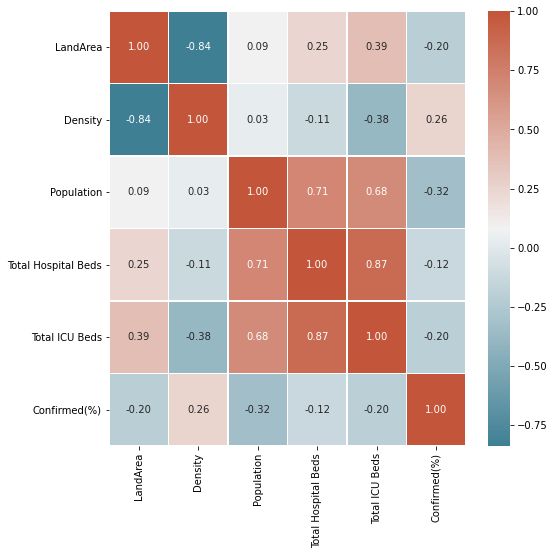

In [146]:
scaler=MaxAbsScaler()
latest_data0=latest_data0.drop(['State','cluster'],axis=1)
latest_data0[latest_data0.columns.values[:]]=scaler.fit_transform(latest_data0[latest_data0.columns.values[:]])
plt.figure(figsize=(8,8))
sns.heatmap(data=latest_data0.corr(),annot=True,fmt=".2f",linewidths=.5,cmap=sns.diverging_palette(220,20,as_cmap=True))

We can find a little bit negative correlation betweeen total hospital, ICU beds and confirmed percentage in cluster_0.

**(2) cluster = 1**

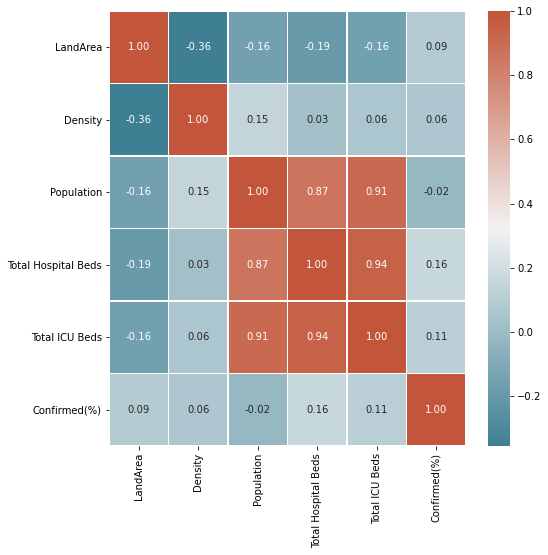

In [147]:
scaler=MaxAbsScaler()
latest_data1=latest_data1.drop(['State','cluster'],axis=1)
latest_data1[latest_data1.columns.values[:]]=scaler.fit_transform(latest_data1[latest_data1.columns.values[:]])
plt.figure(figsize=(8,8))
sns.heatmap(data=latest_data1.corr(),annot=True,fmt=".2f",linewidths=.5,cmap=sns.diverging_palette(220,20,as_cmap=True));

This heatmap doesn't show that nice correlation, but if cluster_2 shows good relationship, then we might use this data in modelling.

**(3) cluster = 2**

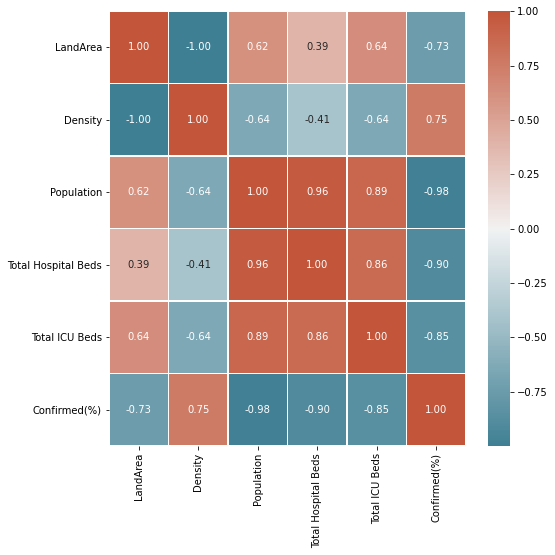

In [148]:
scaler=MaxAbsScaler()
latest_data2=latest_data2.drop(['State','cluster'],axis=1)
latest_data2[latest_data2.columns.values[:]]=scaler.fit_transform(latest_data2[latest_data2.columns.values[:]])
plt.figure(figsize=(8,8))
sns.heatmap(data=latest_data2.corr(),annot=True,fmt=".2f",linewidths=.5,cmap=sns.diverging_palette(220,20,as_cmap=True));

In cluster=3, we can find the correlation value of total hospital, ICU beds and confirmed percentage have relationship.

> I'll make regression model according to clusters, since it shows more distinct correlation to confirmed percentage than that not caring clusters.

### Looking at the correlation between Total Hospital Beds and Confirmed Percentage

**(1) cluster = 0**

<Figure size 1440x432 with 0 Axes>

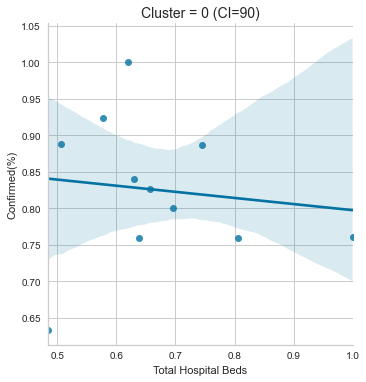

In [134]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,6))
g1=sns.lmplot(x="Total Hospital Beds",y="Confirmed(%)",data=latest_data0.sort_values(['Total Hospital Beds']),ci=90)
ax=plt.gca()
ax.set_title("Cluster = 0 (CI=90)",fontsize=14)
plt.show()

**(2) cluster = 1**

<Figure size 1440x432 with 0 Axes>

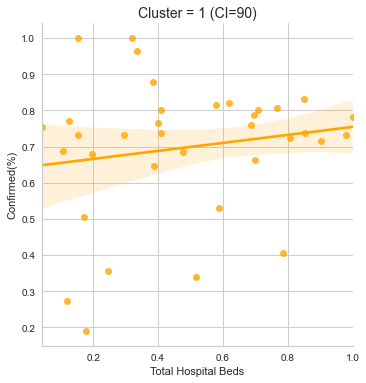

In [135]:
plt.figure(figsize=(20,6))
g1=sns.lmplot(x="Total Hospital Beds",y="Confirmed(%)",data=latest_data1.sort_values(['Total Hospital Beds']),ci=90,
              line_kws={'color':'orange'},scatter_kws={'color':'orange'})
ax=plt.gca()
ax.set_title("Cluster = 1 (CI=90)",fontsize=14)
plt.show()

**(3) cluster = 3**

<Figure size 1440x432 with 0 Axes>

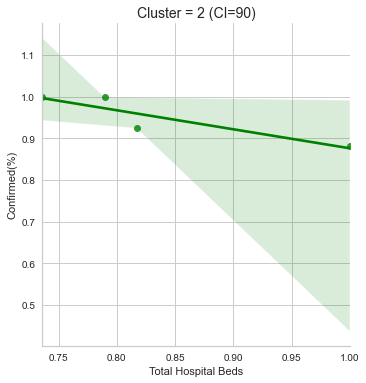

In [136]:
plt.figure(figsize=(20,6))
g1=sns.lmplot(x="Total Hospital Beds",y="Confirmed(%)",data=latest_data2.sort_values(['Total Hospital Beds']),ci=90,
             line_kws={'color':'green'},scatter_kws={'color':'green'})
ax=plt.gca()
ax.set_title("Cluster = 2 (CI=90)",fontsize=14)
plt.show()

> There are some outliers, but we will ignore theme since it would be harder to get precise regression model if we drop more data here.

## 4. Modeling

* I used linear regression model and cross_val_score module to find the best linear regression according to which confirmed percentage of date is provided.
* I will find the best regression model in each clusters by changing the lag from 5 to 15 (by_step=5).
* The attribute of this *lag* idea is from [here](https://dacon.io/competitions/official/235622/codeshare/1591)

### Putting all data except latest confirmed percentage as X_features
* LandArea, Density, Population, Total Hospital Beds, Total ICU Beds, Confirmd(%), Lag confirmed data

### (1) cluster = 0

**(lag = 5)**

In [149]:
# Making X_features and y_target
lag5=pd.merge(latest_data0,final_data0[[448]],left_index=True,right_index=True)

X_features=lag5.drop(['Confirmed(%)'],axis=1)
y_target=lag5['Confirmed(%)']

In [150]:
# Linear Regression model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

linear=LinearRegression()
neg_mse_scores=cross_val_score(linear,X_features,y_target,scoring="neg_mean_squared_error",cv=4)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=rmse_scores.mean()
print("average rmse (lag=5): ",avg_rmse)

average rmse (lag=5):  0.005219158642648288


**(lag = 10)**

In [151]:
# Making X_features and y_target
lag10=pd.merge(latest_data0,final_data0[[443]],left_index=True,right_index=True)

X_features=lag10.drop(['Confirmed(%)'],axis=1)
y_target=lag10['Confirmed(%)']

In [152]:
# Linear Regression model
linear=LinearRegression()
neg_mse_scores=cross_val_score(linear,X_features,y_target,scoring="neg_mean_squared_error",cv=4)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=rmse_scores.mean()
print("average rmse (lag=10): ",avg_rmse)

average rmse (lag=10):  0.009073153827177263


**(lag = 15)**

In [153]:
# Making X_features and y_target
lag15=pd.merge(latest_data0,final_data0[[438]],left_index=True,right_index=True)

X_features=lag15.drop(['Confirmed(%)'],axis=1)
y_target=lag15['Confirmed(%)']

In [154]:
# Linear Regression model
linear=LinearRegression()
neg_mse_scores=cross_val_score(linear,X_features,y_target,scoring="neg_mean_squared_error",cv=4)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=rmse_scores.mean()
print("average rmse (lag=15): ",avg_rmse)

average rmse (lag=15):  0.01233481019115792


We can find that *lag=5* shows the smallest RMSE in cluster_0.

### (1) cluster = 1

**(lag = 5)**

In [155]:
# Making X_features and y_target
lag5=pd.merge(latest_data1,final_data1[[448]],left_index=True,right_index=True)

X_features=lag5.drop(['Confirmed(%)'],axis=1)
y_target=lag5['Confirmed(%)']

# Linear Regression model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

linear=LinearRegression()
neg_mse_scores=cross_val_score(linear,X_features,y_target,scoring="neg_mean_squared_error",cv=4)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=rmse_scores.mean()
print("average rmse (lag=5): ",avg_rmse)

average rmse (lag=5):  0.0024511284439502714


**(lag = 10)**

In [156]:
# Making X_features and y_target
lag10=pd.merge(latest_data1,final_data1[[443]],left_index=True,right_index=True)

X_features=lag10.drop(['Confirmed(%)'],axis=1)
y_target=lag10['Confirmed(%)']

# Linear Regression model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

linear=LinearRegression()
neg_mse_scores=cross_val_score(linear,X_features,y_target,scoring="neg_mean_squared_error",cv=4)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=rmse_scores.mean()
print("average rmse (lag=10): ",avg_rmse)

average rmse (lag=10):  0.0032204683320050907


**(lag = 15)**

In [157]:
# Making X_features and y_target
lag15=pd.merge(latest_data1,final_data1[[438]],left_index=True,right_index=True)

X_features=lag15.drop(['Confirmed(%)'],axis=1)
y_target=lag15['Confirmed(%)']

# Linear Regression model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

linear=LinearRegression()
neg_mse_scores=cross_val_score(linear,X_features,y_target,scoring="neg_mean_squared_error",cv=4)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=rmse_scores.mean()
print("average rmse (lag=15): ",avg_rmse)

average rmse (lag=15):  0.0046474133641266485


We can find that *lag=5* shows the smallest RMSE in cluster_1.

### (3) cluster = 2

**(lag = 5)**

In [158]:
# Making X_features and y_target
lag5=pd.merge(latest_data2,final_data2[[448]],left_index=True,right_index=True)

X_features=lag5.drop(['Confirmed(%)'],axis=1)
y_target=lag5['Confirmed(%)']

# Linear Regression model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

linear=LinearRegression()
neg_mse_scores=cross_val_score(linear,X_features,y_target,scoring="neg_mean_squared_error",cv=4)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=rmse_scores.mean()
print("average rmse (lag=5): ",avg_rmse)

average rmse (lag=5):  0.07804876641872843


**(lag = 10)**

In [159]:
# Making X_features and y_target
lag10=pd.merge(latest_data2,final_data2[[443]],left_index=True,right_index=True)

X_features=lag10.drop(['Confirmed(%)'],axis=1)
y_target=lag10['Confirmed(%)']

# Linear Regression model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

linear=LinearRegression()
neg_mse_scores=cross_val_score(linear,X_features,y_target,scoring="neg_mean_squared_error",cv=4)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=rmse_scores.mean()
print("average rmse (lag=10): ",avg_rmse)

average rmse (lag=10):  0.08767416761153041


**(lag = 15)**

In [160]:
# Making X_features and y_target
lag15=pd.merge(latest_data2,final_data2[[438]],left_index=True,right_index=True)

X_features=lag15.drop(['Confirmed(%)'],axis=1)
y_target=lag15['Confirmed(%)']

# Linear Regression model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

linear=LinearRegression()
neg_mse_scores=cross_val_score(linear,X_features,y_target,scoring="neg_mean_squared_error",cv=4)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=rmse_scores.mean()
print("average rmse (lag=15): ",avg_rmse)

average rmse (lag=15):  0.08764629238387556


We can find that *lag=5* shows the smallest RMSE in cluster_2.

It's much better using past confirmed percentage data than *not* using it, which was my first analysis.
> By evaluating each of lags and clusters, we found that no matter what cluster the province is, the lag_5 is the best.

### Plotting
Plotting predictions of confirmed percentage in each of clusters with lag_5

In [161]:
# Making function that predicts and plots
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

def plotting_prediction(cluster,X_features,y_target):
    linear_reg=LinearRegression()
    X_train,X_test,y_train,y_test=train_test_split(X_features,y_target,test_size=0.3,random_state=120)
    linear_reg.fit(X_train,y_train)
    print("[Feature Importance]\n",linear_reg.coef_,"\n")
    predictions=linear_reg.predict(X_test)
    mse=mean_squared_error(y_true=y_test,y_pred=predictions)
    rmse=np.round(np.sqrt(mse),4)
    plt.figure(figsize=(8,8))
    plt.scatter(x=[i for i in range(len(predictions))],y=predictions,color="red",label="Prediction")
    plt.scatter(x=[i for i in range(len(X_test))],y=y_test,color="black",label="Real Value")
    plt.legend()
    plt.xlabel("Province",fontsize=14)
    plt.ylabel("Confirmed Percentage",fontsize=14)
    plt.title("Prediction of {}\nRMSE: {}".format(cluster,rmse),fontsize=17)
    plt.show()
    return(rmse)

In [190]:
rmse_all=[]

**cluster = 0**

[Feature Importance]
 [ 3.68273021e-02  7.71200340e-02 -2.00412607e-02 -3.04705489e-03
  4.70708746e-03  7.89849492e+00] 



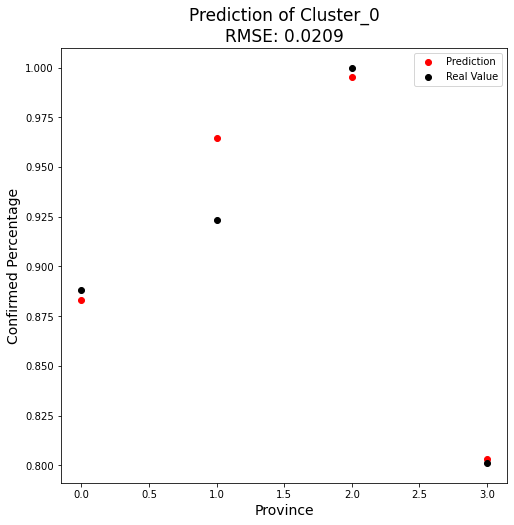

In [191]:
lag5=pd.merge(latest_data0,final_data0[[448]],left_index=True,right_index=True)

X_features=lag5.drop(['Confirmed(%)'],axis=1)
y_target=lag5['Confirmed(%)']

rmse_all.append(plotting_prediction("Cluster_0",X_features,y_target))

**cluster = 1**

[Feature Importance]
 [ 2.84361015e-03 -1.82666617e-03 -6.96671598e-03  1.63976282e-04
  9.52195669e-03  6.93393250e+00] 



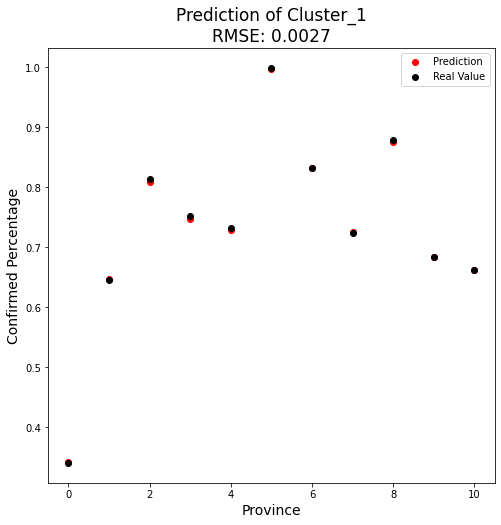

In [192]:
lag5=pd.merge(latest_data1,final_data1[[448]],left_index=True,right_index=True)

X_features=lag5.drop(['Confirmed(%)'],axis=1)
y_target=lag5['Confirmed(%)']

rmse_all.append(plotting_prediction("Cluster_1",X_features,y_target))

**cluster = 2**

[Feature Importance]
 [ 0.04409698 -0.0367434  -0.01774763 -0.02891901 -0.02225863  0.00049533] 



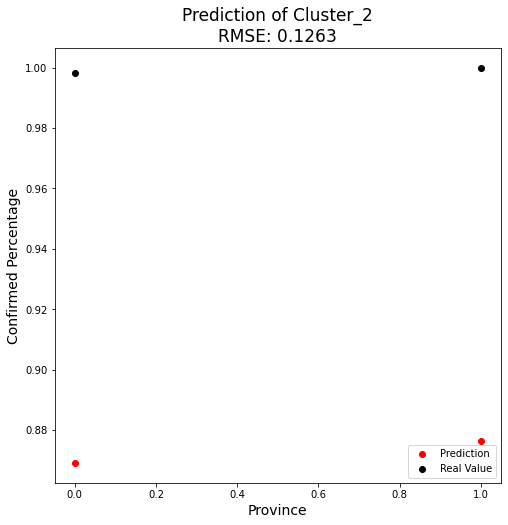

In [193]:
lag5=pd.merge(latest_data2,final_data2[[448]],left_index=True,right_index=True)

X_features=lag5.drop(['Confirmed(%)'],axis=1)
y_target=lag5['Confirmed(%)']

rmse_all.append(plotting_prediction("Cluster_2",X_features,y_target))

> We can find that the most important feature in predicting confirmed percentage is lagged confirmed percentage data in cluster_0 and 1.

> As the total hospital beds are higher, its importance also goes up.

### Putting data except LandArea, Population and latest confirmed percentage as X_features
* X_features : Density, Total Hospital Beds, Total ICU Beds, Confirmd(%), Lag confirmed data

In [194]:
rmse_except=[]

**(1) cluster = 0**

[Feature Importance]
 [-8.09298976e-02  4.77748995e-03  6.78343615e-03  7.92765276e+00] 



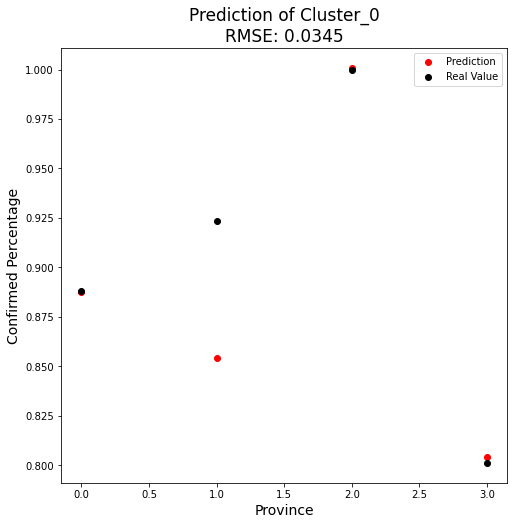

In [195]:
lag5=pd.merge(latest_data0,final_data0[[448]],left_index=True,right_index=True)

X_features=lag5.drop(['LandArea','Population','Confirmed(%)'],axis=1)
y_target=lag5['Confirmed(%)']

rmse_except.append(plotting_prediction("Cluster_0",X_features,y_target))

**(2) cluster = 1**

[Feature Importance]
 [-4.19529468e-03 -3.16970125e-03  6.36661259e-03  6.94835254e+00] 



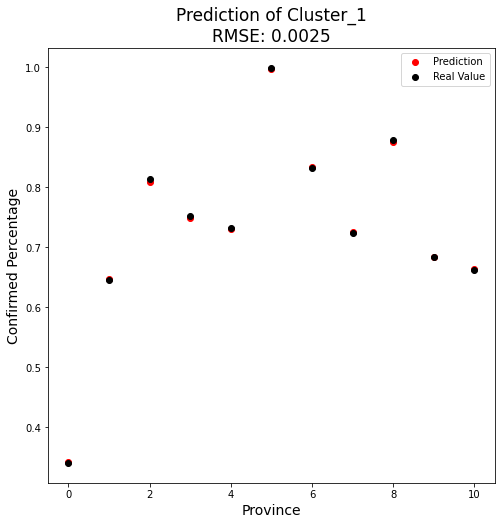

In [196]:
lag5=pd.merge(latest_data1,final_data1[[448]],left_index=True,right_index=True)

X_features=lag5.drop(['LandArea','Population','Confirmed(%)'],axis=1)
y_target=lag5['Confirmed(%)']

rmse_except.append(plotting_prediction("Cluster_1",X_features,y_target))

**(3) cluster = 2**

[Feature Importance]
 [-0.16788432  0.03375268  0.071572    0.00296524] 



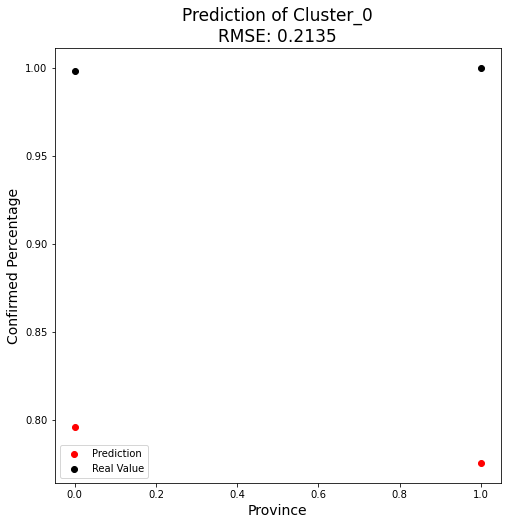

In [197]:
lag5=pd.merge(latest_data2,final_data2[[448]],left_index=True,right_index=True)

X_features=lag5.drop(['LandArea','Population','Confirmed(%)'],axis=1)
y_target=lag5['Confirmed(%)']

rmse_except.append(plotting_prediction("Cluster_0",X_features,y_target))

**Compare RMSE of all data and not all data as X_features**

In [200]:
print("RMSE_ALL : ",rmse_all)
print("RMSE_EX2 : ",rmse_except)

RMSE_ALL :  [0.0209, 0.0027, 0.1263]
RMSE_EX2 :  [0.0345, 0.0025, 0.2135]


**We can find that, without LandArea, Population feaure, the regression model gives us better prediction on future confirmed percentage.**

> When we predict Korean provinces' confirmed percentage, we can drop LandArea and Population feature. 

### X_features Without LandArea, Population and Total ICU Beds
* X_features : Density, Total Hospital Beds, Confirmd(%), Lag confirmed data

**(1) cluster = 0**

[Feature Importance]
 [-0.05137977 -0.19502131  0.019592    8.27832982] 



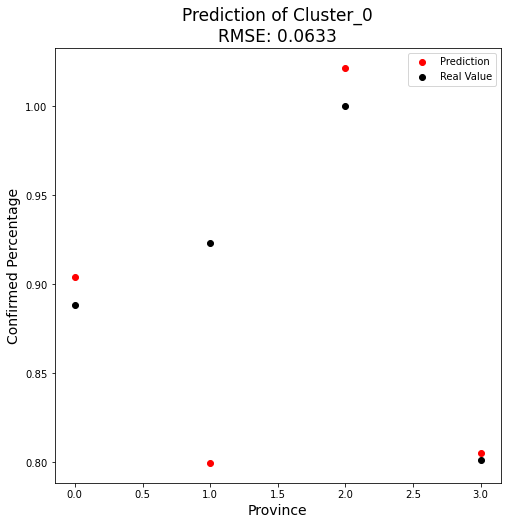

In [183]:
lag5=pd.merge(latest_data0,final_data0[[448]],left_index=True,right_index=True)

X_features=lag5.drop(['Confirmed(%)','Total ICU Beds','Population'],axis=1)
y_target=lag5['Confirmed(%)']

rmse_except3=[]
rmse_except3.append(plotting_prediction("Cluster_0",X_features,y_target))

**(2) cluster = 1**

[Feature Importance]
 [ 2.68023998e-03 -3.15887950e-03  3.45107248e-03  6.93980649e+00] 



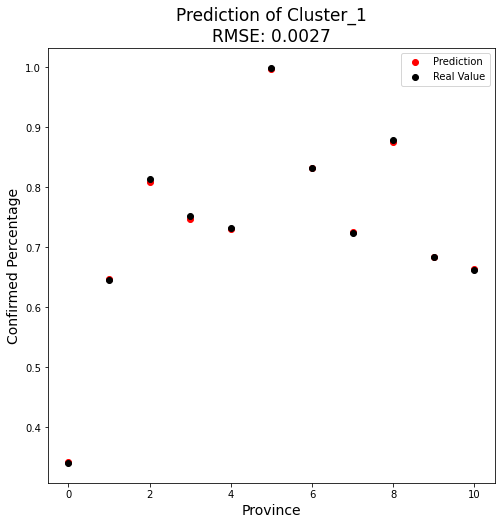

In [184]:
lag5=pd.merge(latest_data1,final_data1[[448]],left_index=True,right_index=True)

X_features=lag5.drop(['Confirmed(%)','Total ICU Beds','Population'],axis=1)
y_target=lag5['Confirmed(%)']

rmse_except3.append(plotting_prediction("Cluster_1",X_features,y_target))

**(3) cluster = 2**

[Feature Importance]
 [ 0.05501815 -0.04675267 -0.0249165   0.00062695] 



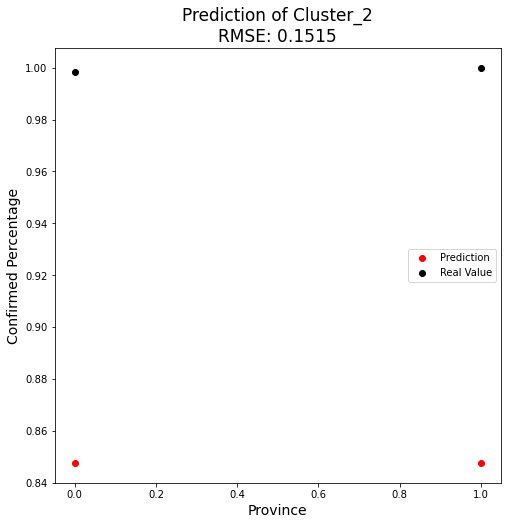

In [185]:
lag5=pd.merge(latest_data2,final_data2[[448]],left_index=True,right_index=True)

X_features=lag5.drop(['Confirmed(%)','Total ICU Beds','Population'],axis=1)
y_target=lag5['Confirmed(%)']

rmse_except3.append(plotting_prediction("Cluster_2",X_features,y_target))

In [199]:
print("RMSE_ALL : ",rmse_all)
print("RMSE_EX2 : ",rmse_except)
print("RMSE_EX3 : ",rmse_except3)

RMSE_ALL :  [0.0209, 0.0027, 0.1263]
RMSE_EX2 :  [0.0345, 0.0025, 0.2135]
RMSE_EX3 :  [0.0633, 0.0027, 0.1515]


There are almost no difference in putting just population density, total hospital beds and lag data as X_features.
> Since there's no ICU beds data in Korean data, which is our final goal, I'll use the last model as the prediction model.

### Korean Confirmed Percentage Prediction Will be processed in another notebook.